# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Importing Files

In [2]:
toyota=pd.read_csv("ToyotaCorolla.csv", encoding='latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

We dont need all the columns. We only need ("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
as per the question.

In [4]:
toyota1=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [5]:
toyota1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
toyota1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
toyota1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [9]:
toyota1.duplicated().sum()

1

In [10]:
toyota1[toyota1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
toyota2=toyota1.drop_duplicates().reset_index(drop=True)

In [12]:
toyota2.duplicated().sum()

0

In [13]:
toyota3=toyota2.rename({'Age_08_04':'Age','Quarterly_Tax':'QT','cc':'CC'},axis=1)
toyota3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Correlation
Our Target Variable is Price

In [14]:
toyota3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


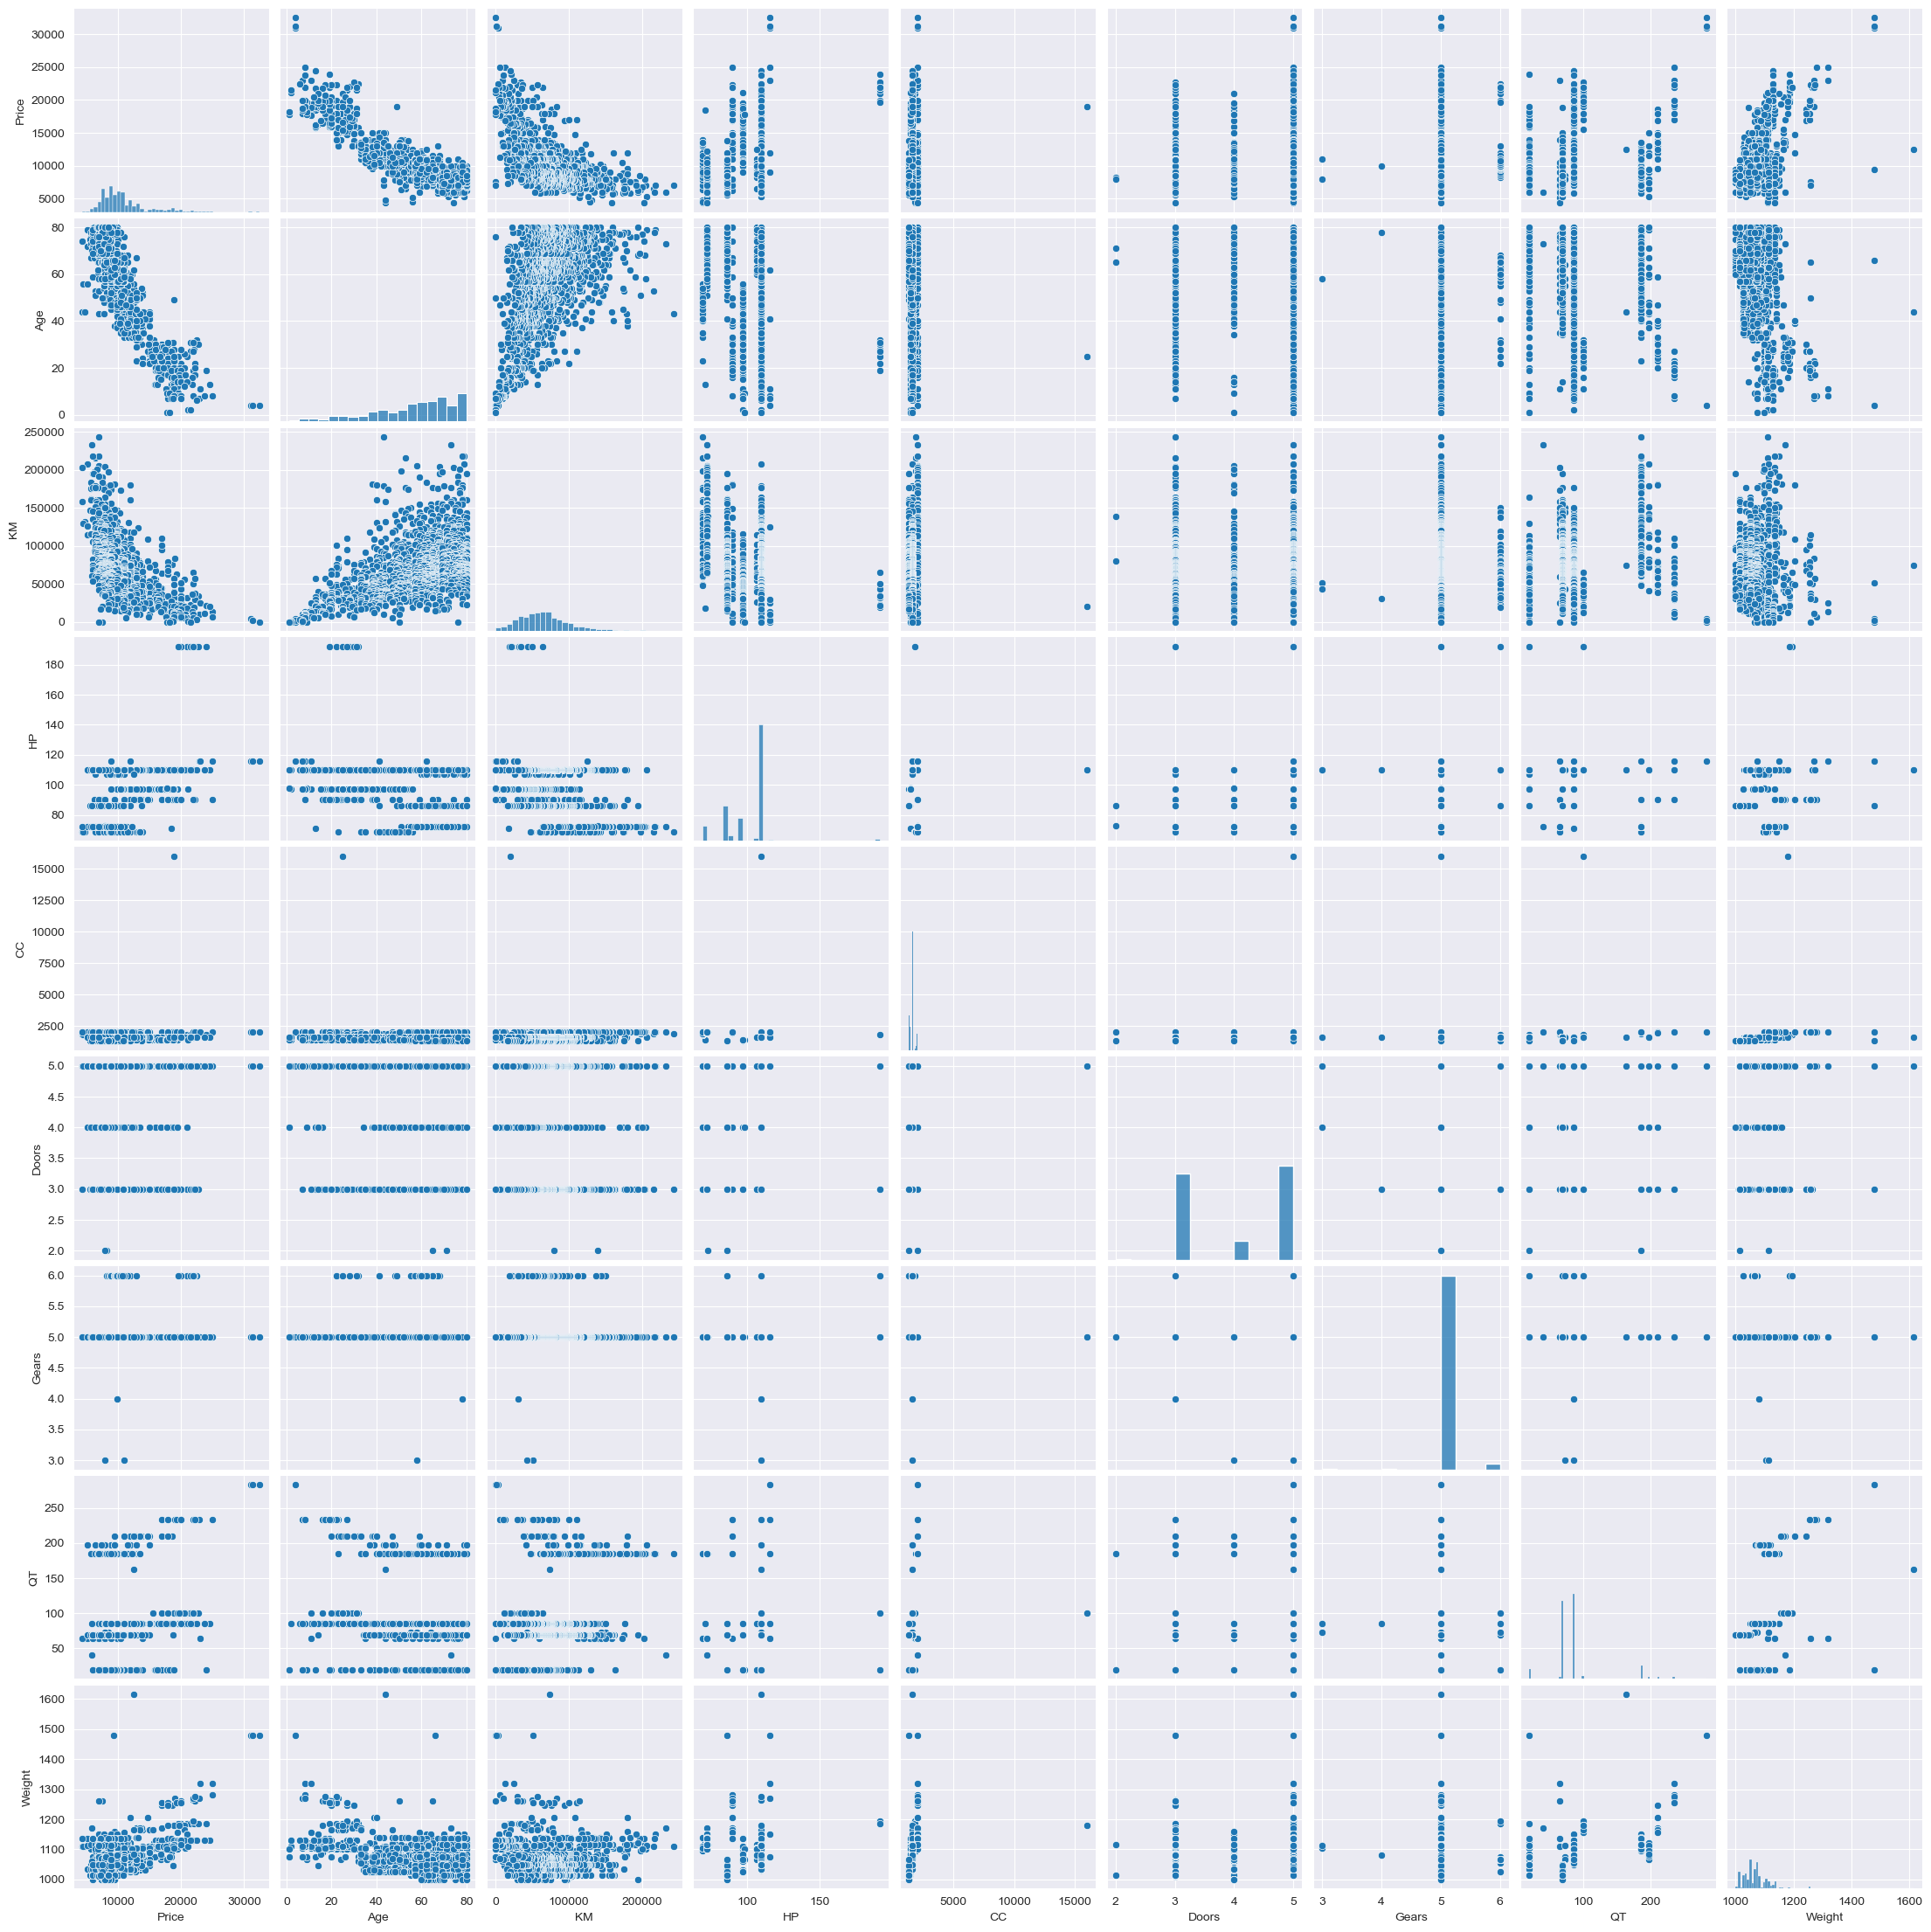

In [15]:
#Visualsing using pairplot
sns.set_style(style='darkgrid')
sns.pairplot(toyota3)

# Basic Model Building

In [16]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=toyota3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:36:01   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [18]:
model.tvalues, np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [19]:
#Making Simple Linear Regression models for variables with insignificant pvalues viz., "CC" and "Doors"

In [20]:
model1=smf.ols('Price~CC', data=toyota3).fit()  # CC is Significant
model1.tvalues,model1.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [21]:
model2=smf.ols('Price~Doors', data=toyota3).fit()    # Doors is also Significant
model2.tvalues,model1.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [22]:
#Lets see if they both together are significant or not
model3=smf.ols('Price~CC+Doors', data=toyota3).fit()
model3.tvalues,model1.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

They both together are also significant, so no need to remove any columns.

# Checking Assumptions

In [23]:
#1st is Multi Collinearity Check
#We will build models with every Independent Variable as the Target Variable (Excluding Price entirely)
#We can use VIF = 1/(1-rsquare)

#Price	Age	KM	HP	CC	Doors	Gears	QT	Weight

r_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_age = 1/(1-r_age)

r_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_km = 1/(1-r_km)

r_hp = smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_hp = 1/(1-r_hp)

r_cc = smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_cc = 1/(1-r_cc)

r_doors = smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight',data=toyota3).fit().rsquared
vif_doors = 1/(1-r_doors)

r_gears = smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight',data=toyota3).fit().rsquared
vif_gears = 1/(1-r_gears)

r_qt = smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight',data=toyota3).fit().rsquared
vif_qt = 1/(1-r_qt)

r_weight = smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age',data=toyota3).fit().rsquared
vif_weight = 1/(1-r_weight)


a={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
   'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}

df= pd.DataFrame(a)
df

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [24]:
#Here VIF are Less than 10 so we can say that their is no multi collinearity among the independent variables.

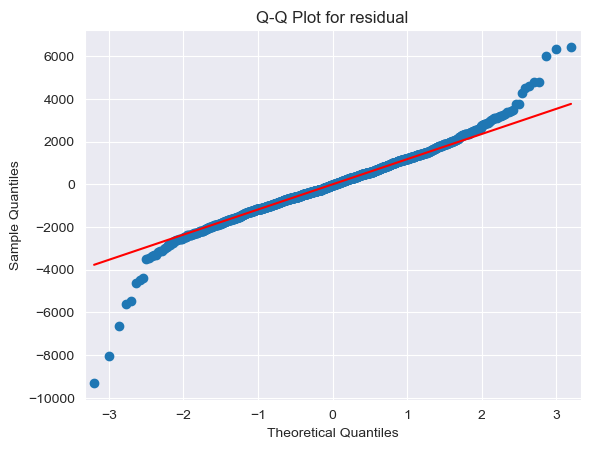

In [26]:
#2nd Residual Analysis:- The Residuals must follow a normal distribution
#We will use qq-plot for this
sm.qqplot(model.resid, line='q')
plt.title('Q-Q Plot for residual')
plt.show()

In [27]:
#It follows almost Normal Distribution except some outliers
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [28]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

# Checking for Homoscedasticity and Hetroscedasticity

In [29]:
def Standarad_Values(vals) : return (vals - vals.mean())/vals.std()    # z = (x - mu) / sigma

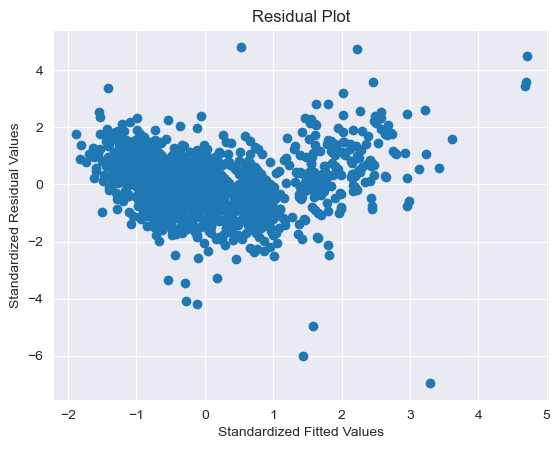

In [30]:
plt.scatter(Standarad_Values(model.fittedvalues), Standarad_Values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [31]:
#Test for Residual versus Regressors
#Using Residual regression plots

eval_env: 1


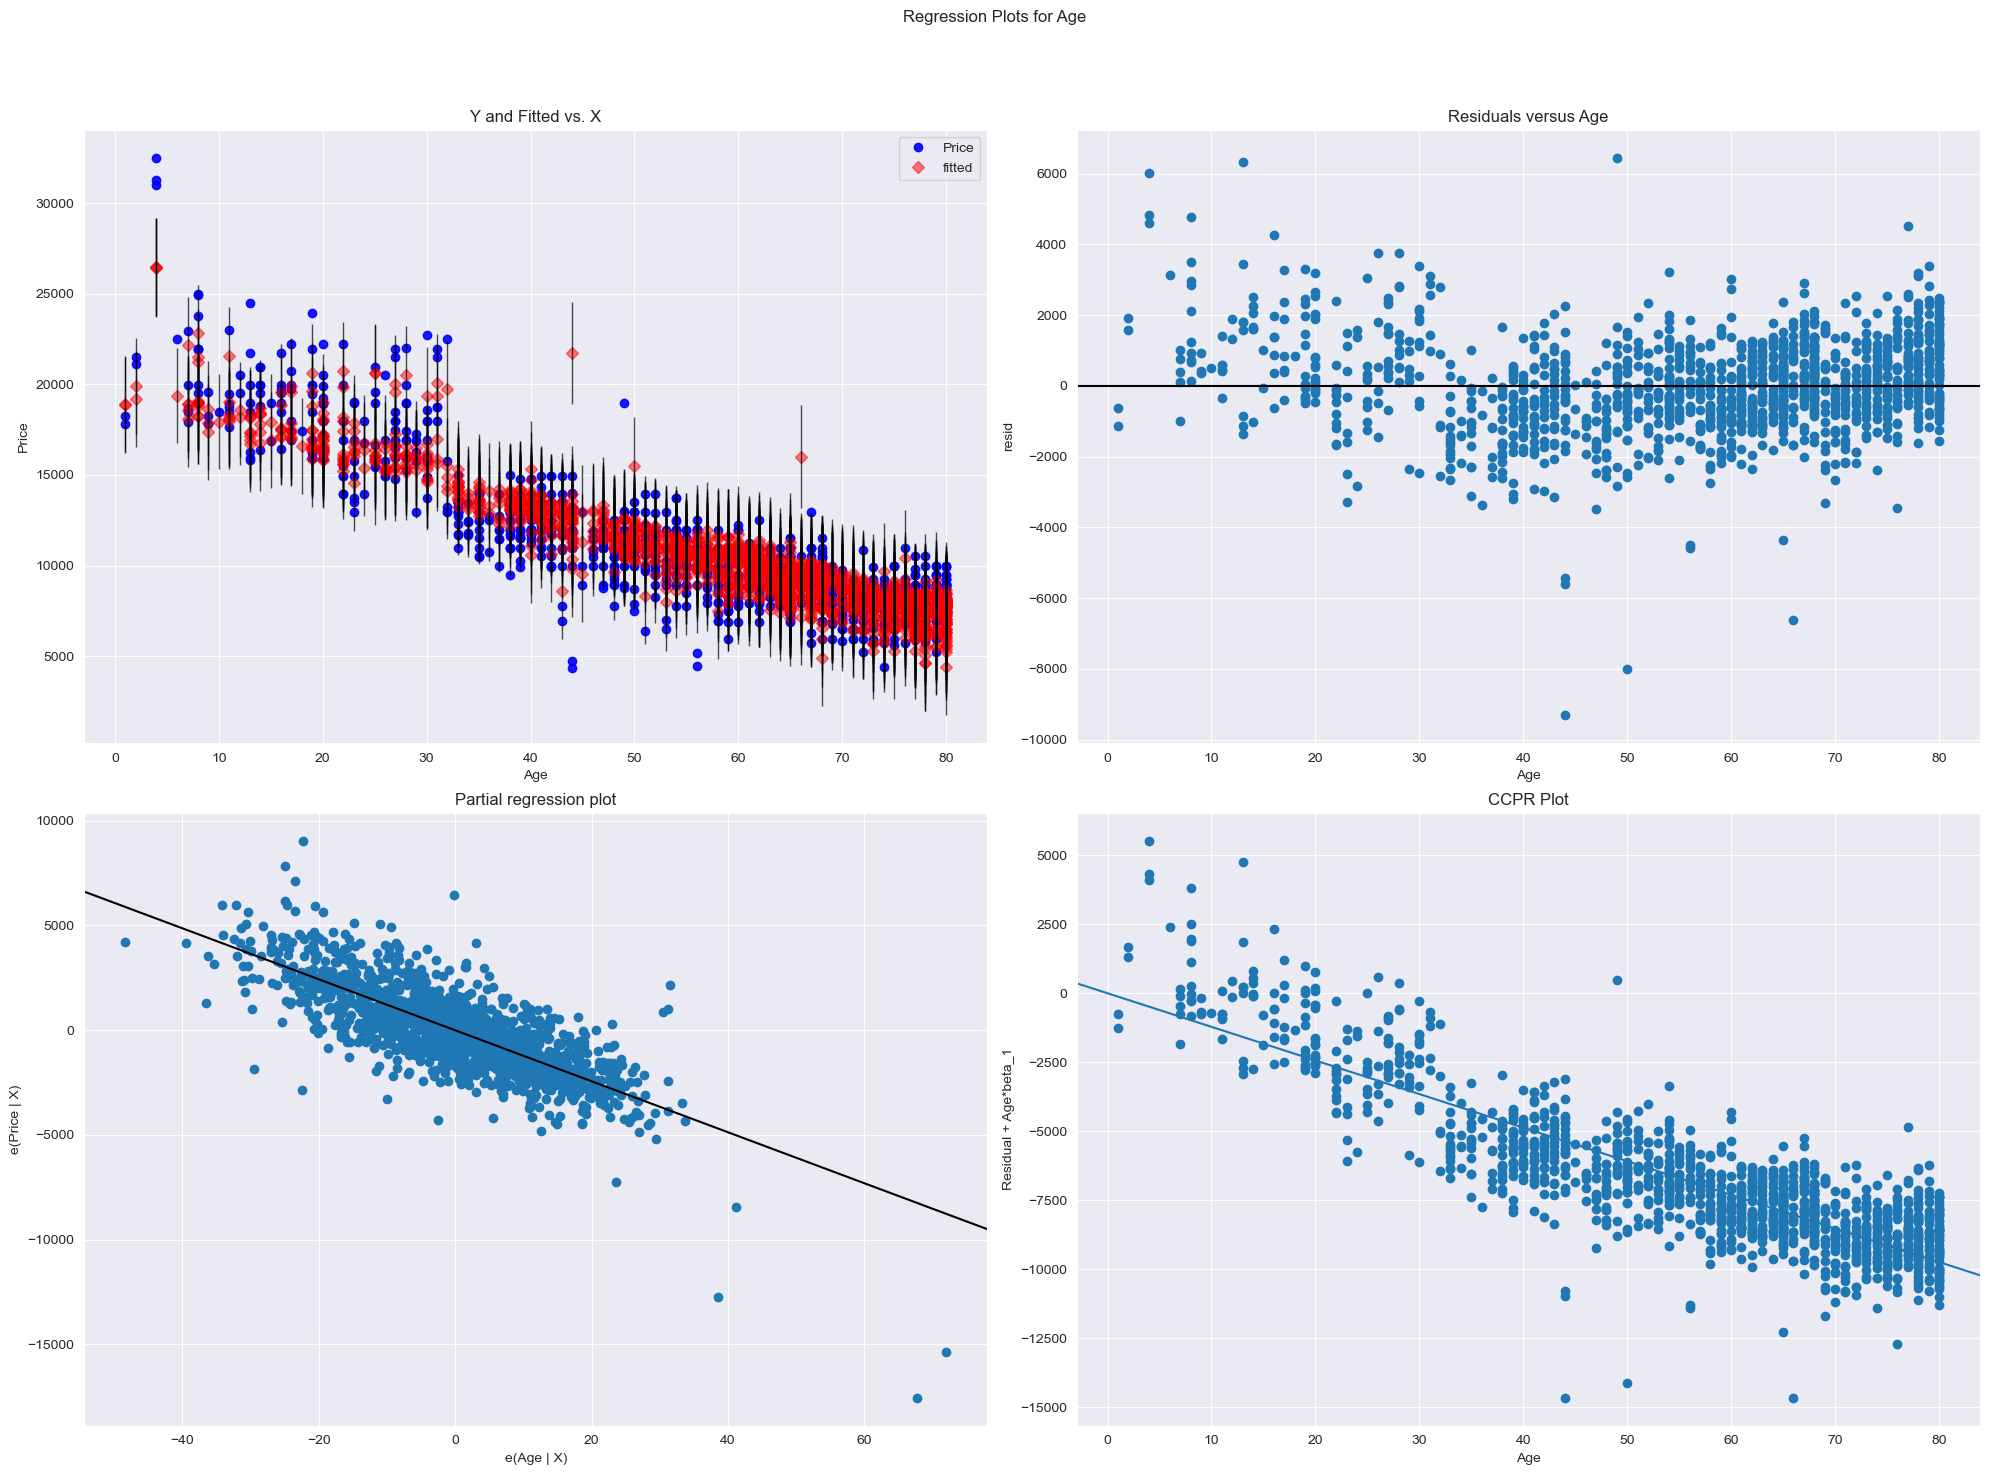

In [40]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


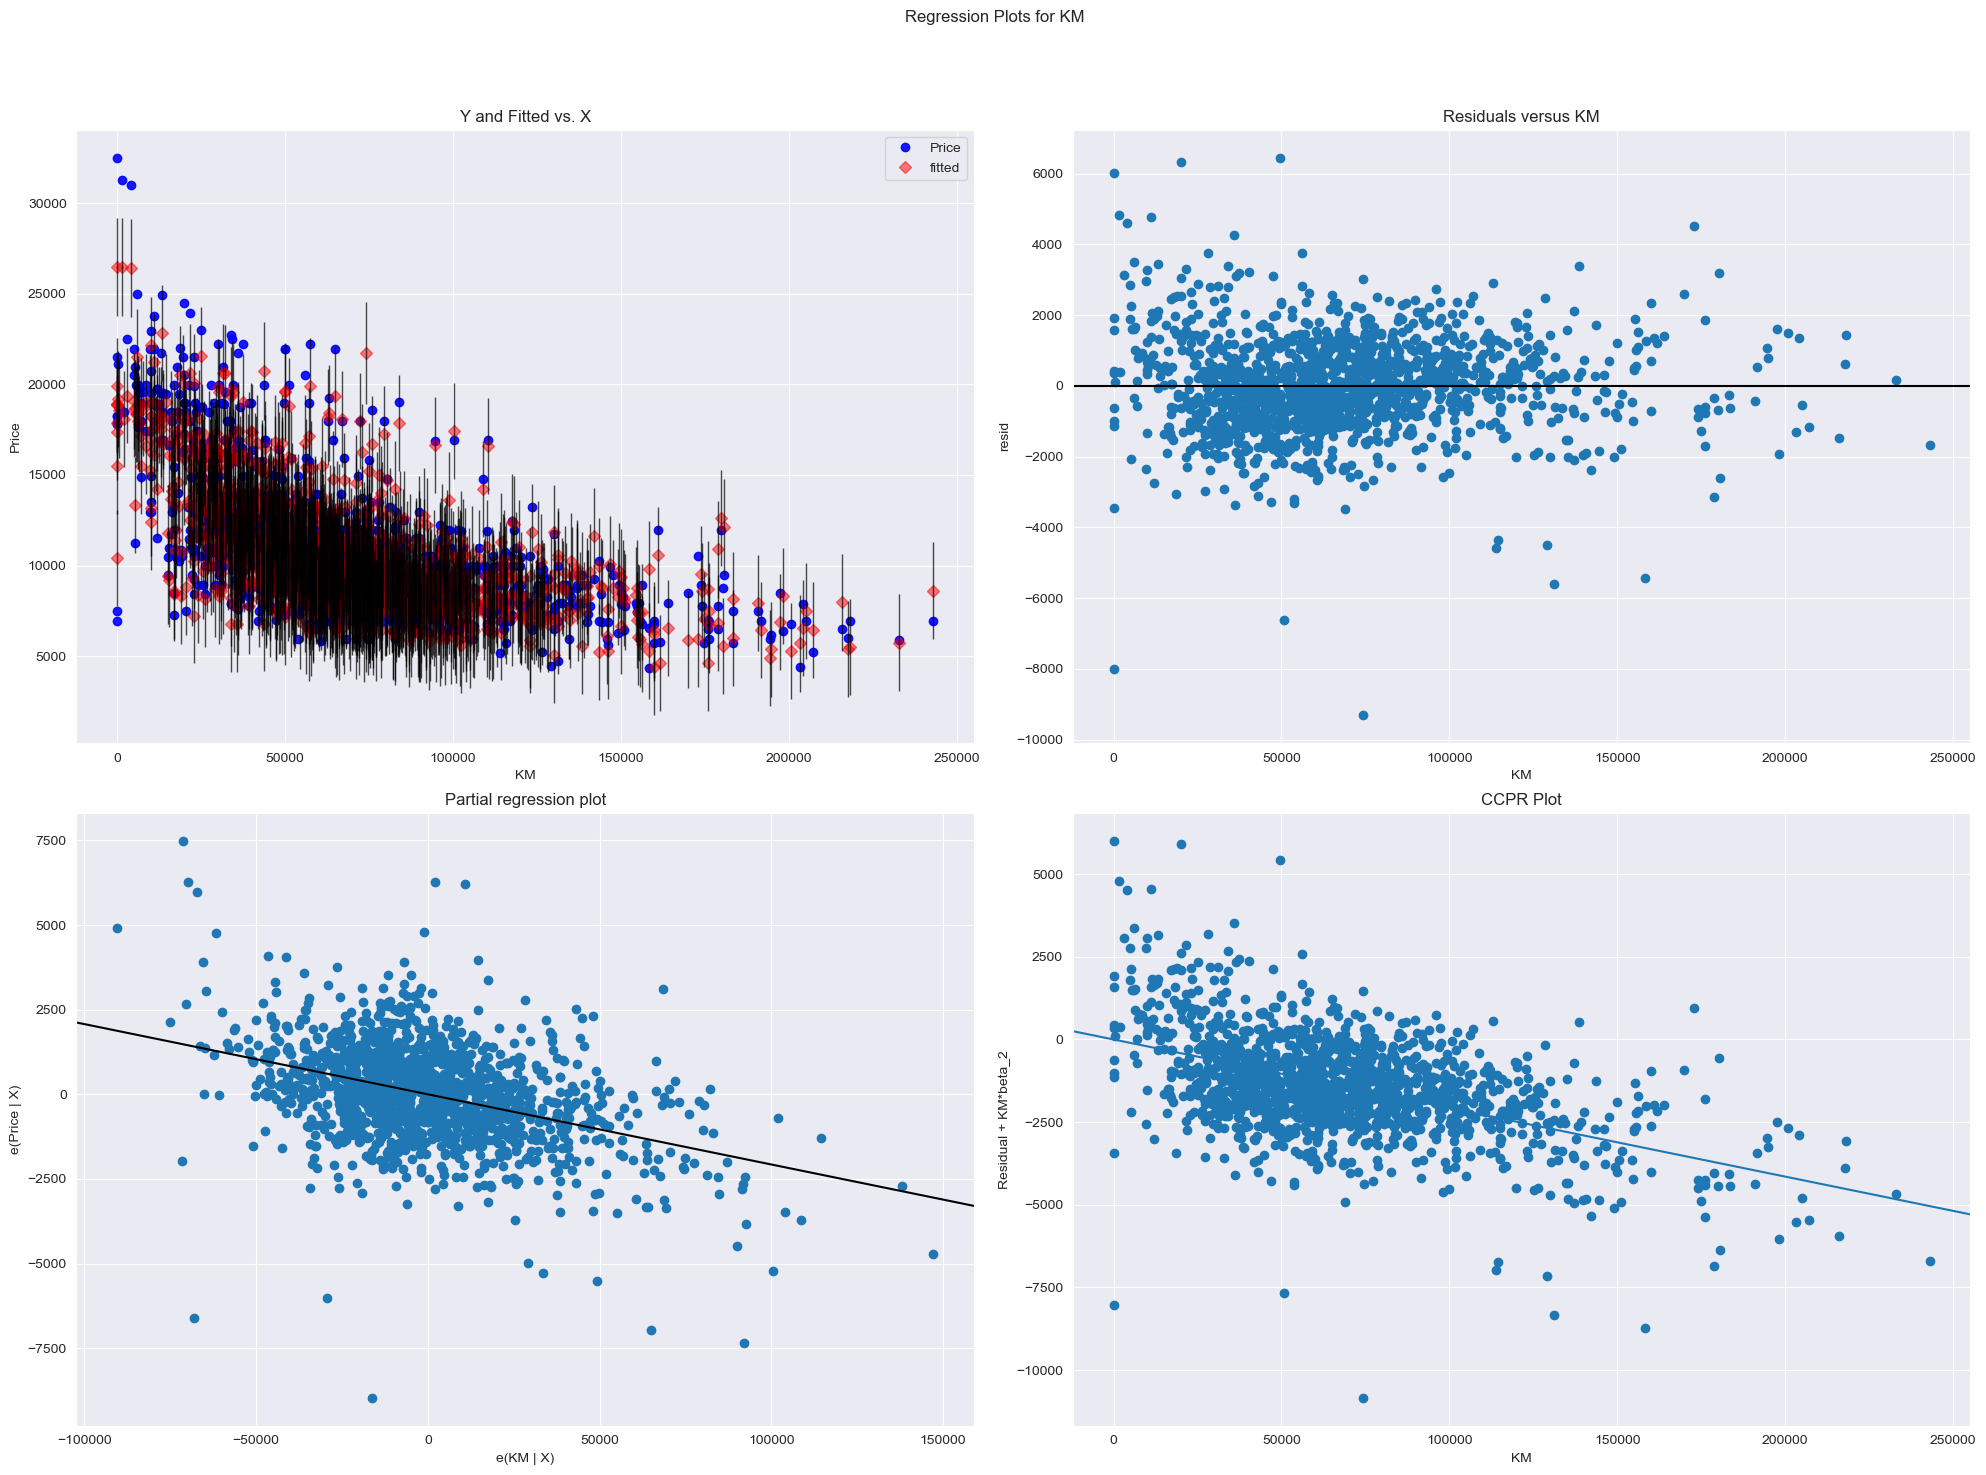

In [41]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


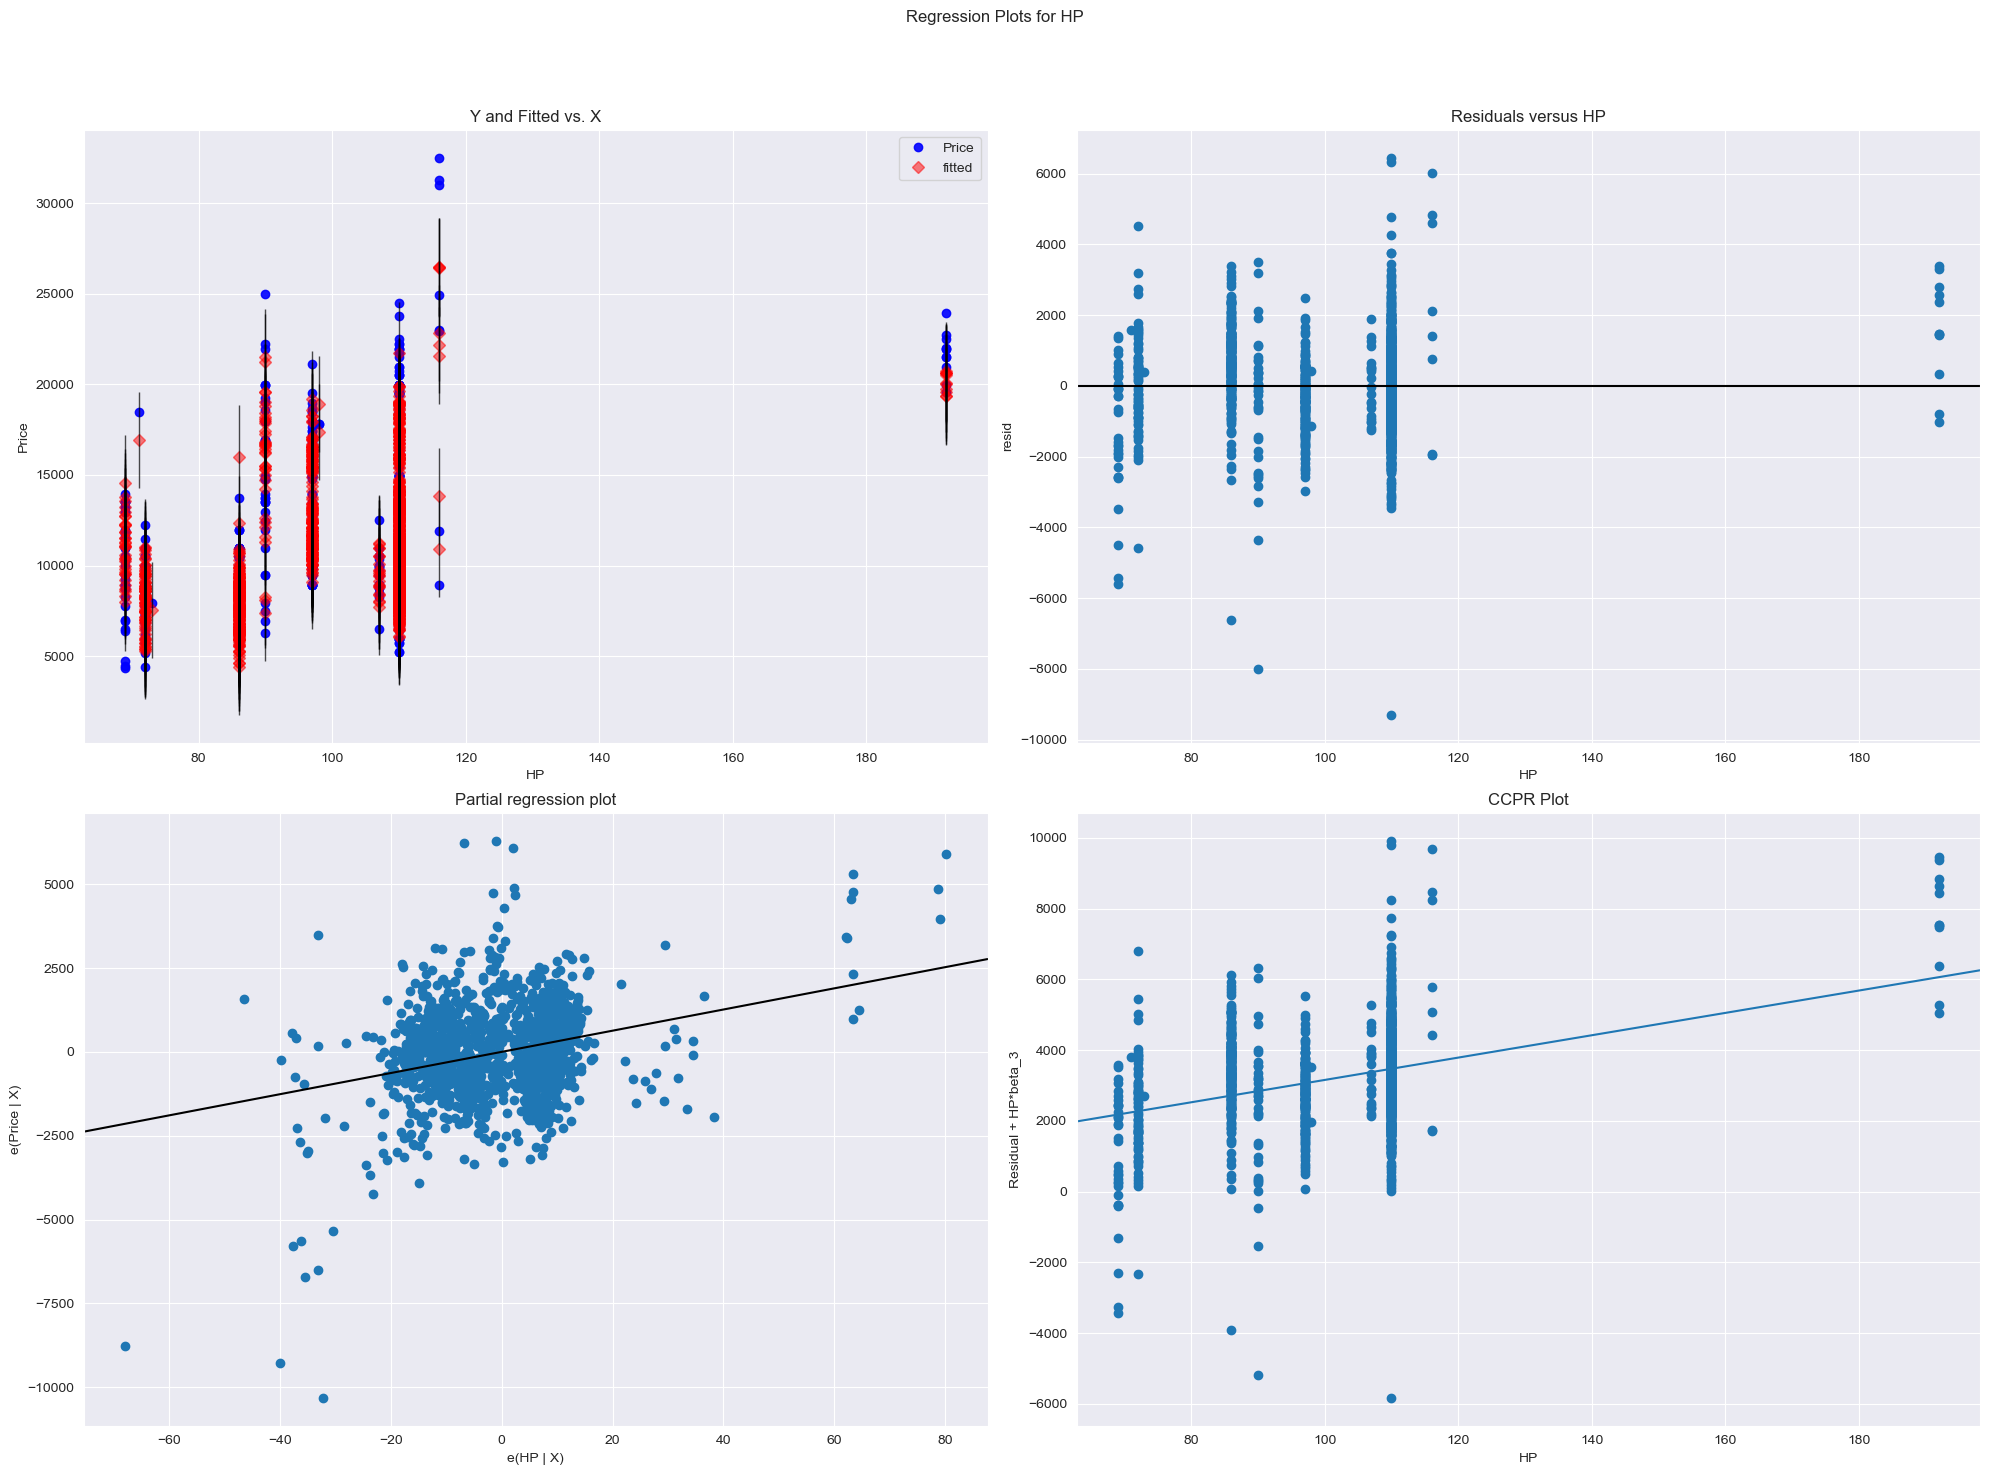

In [42]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


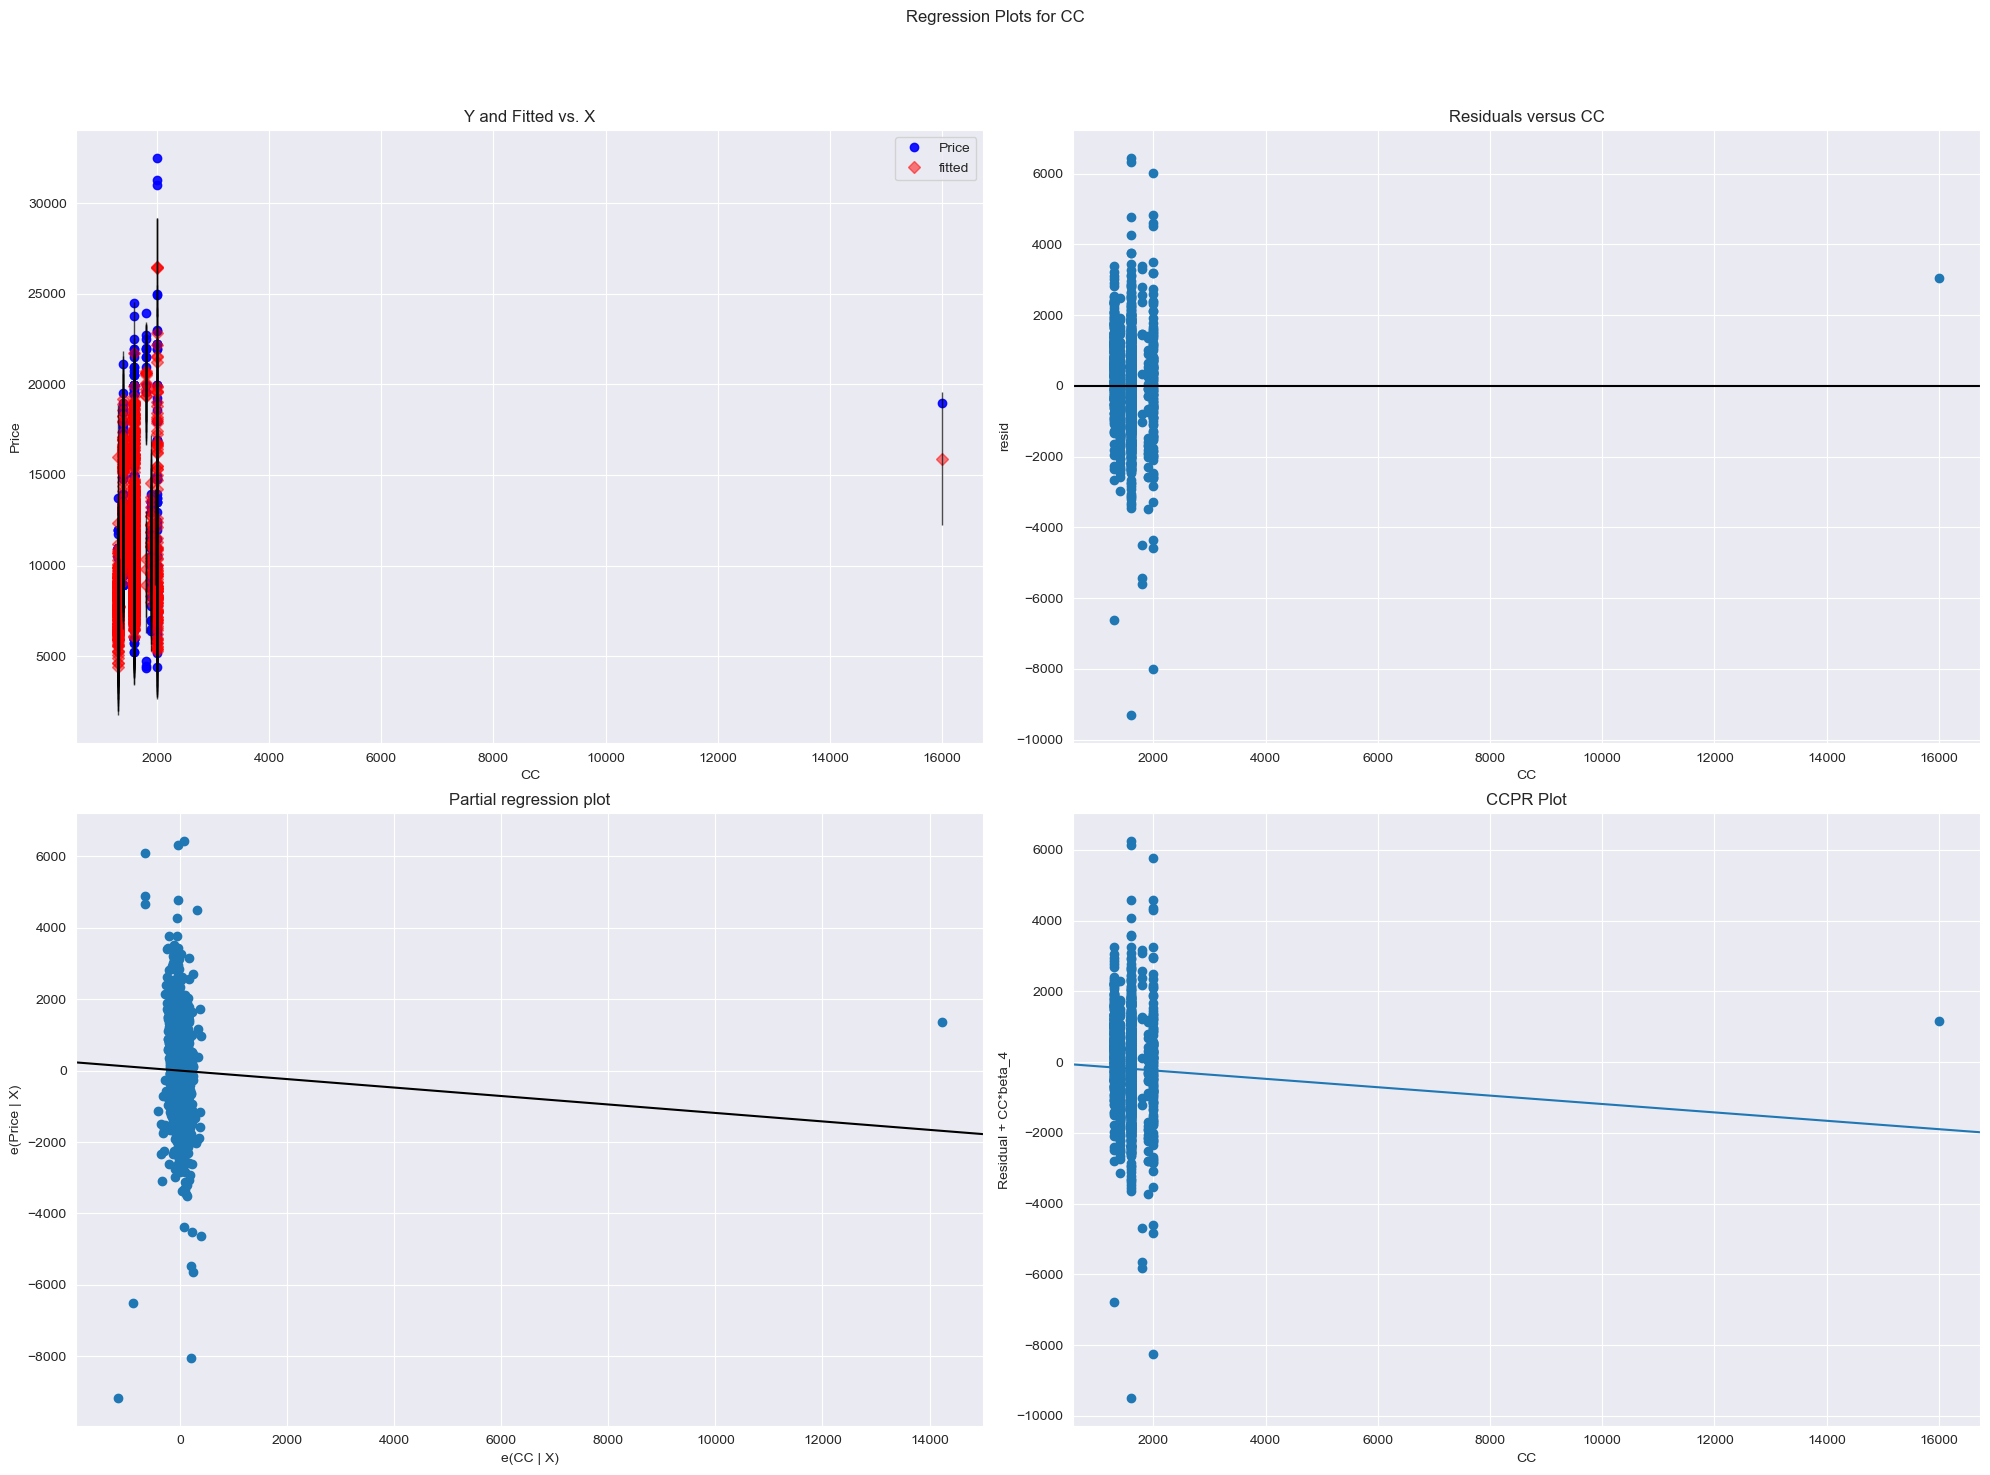

In [43]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


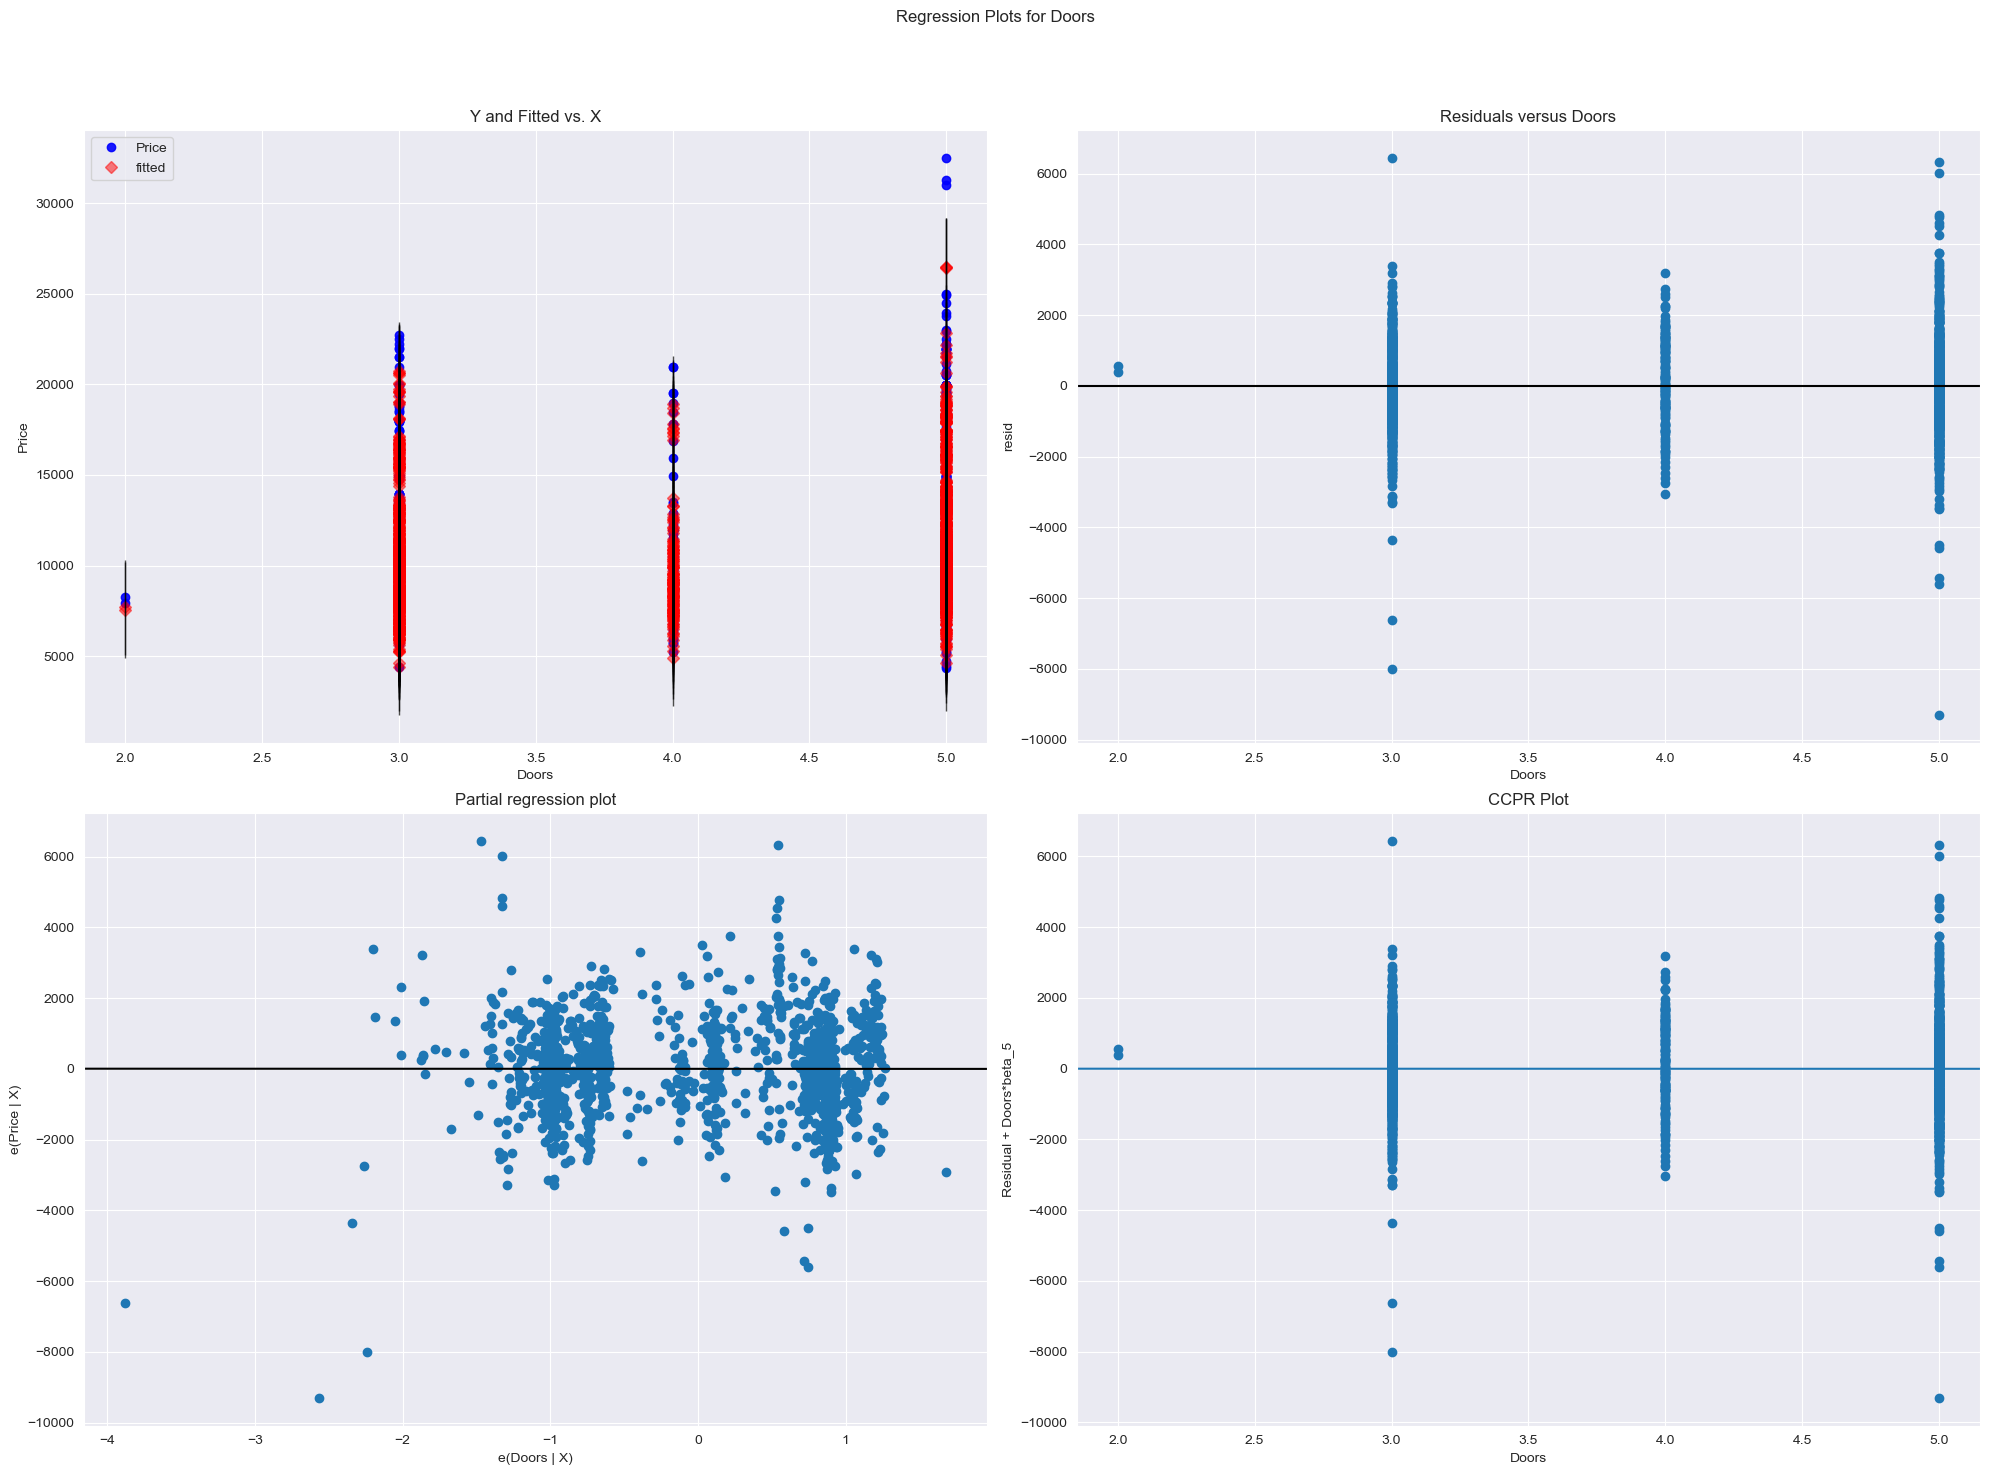

In [44]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


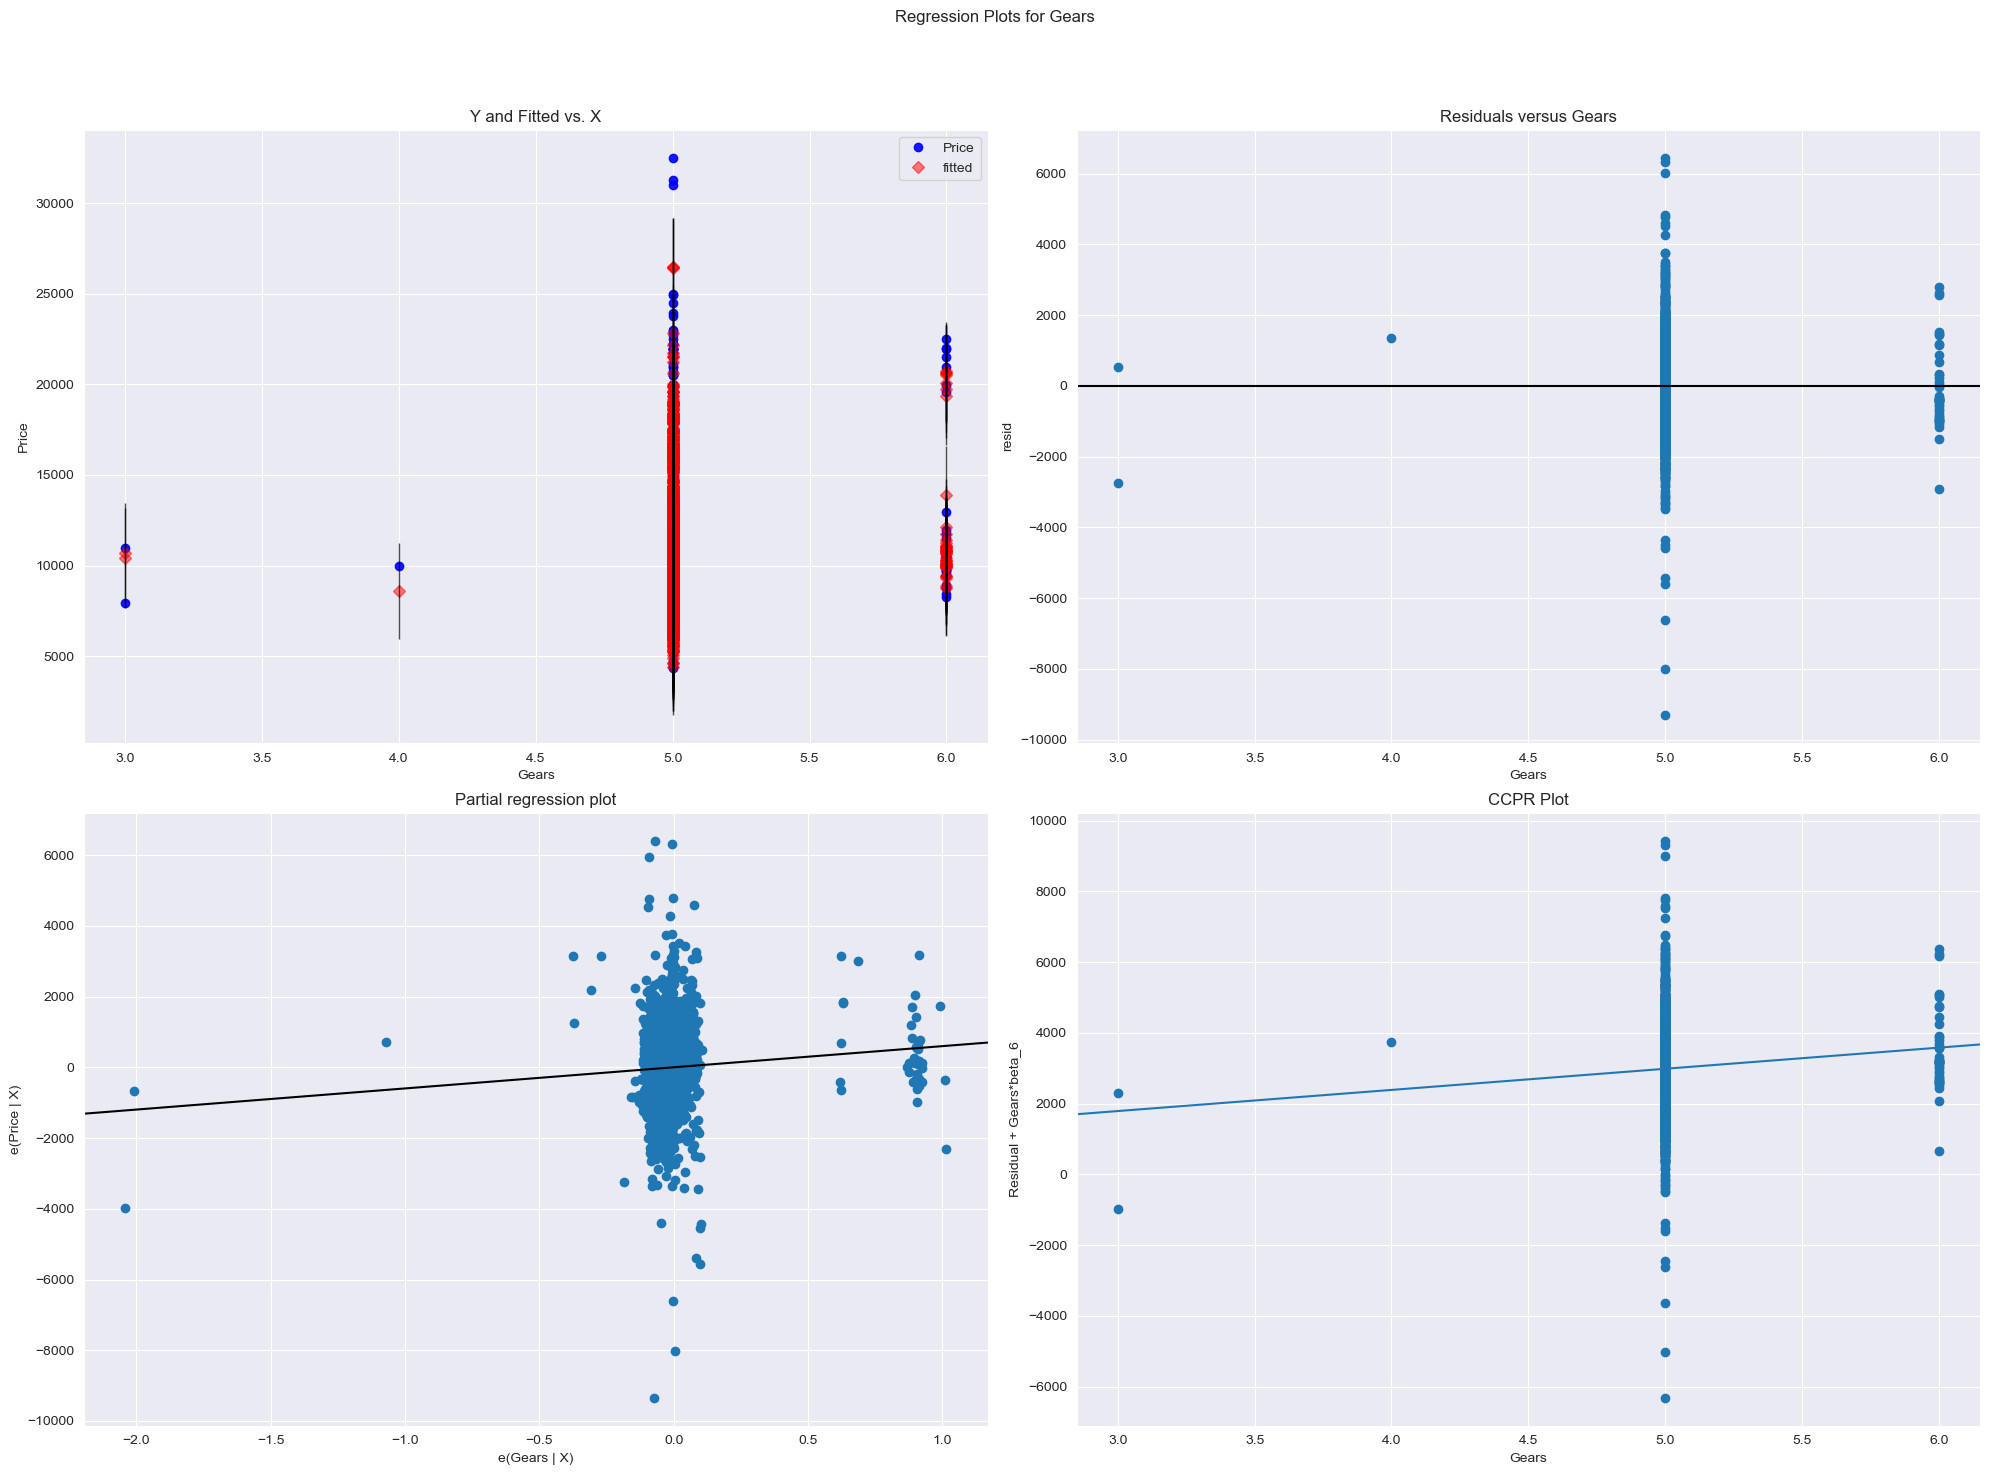

In [45]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


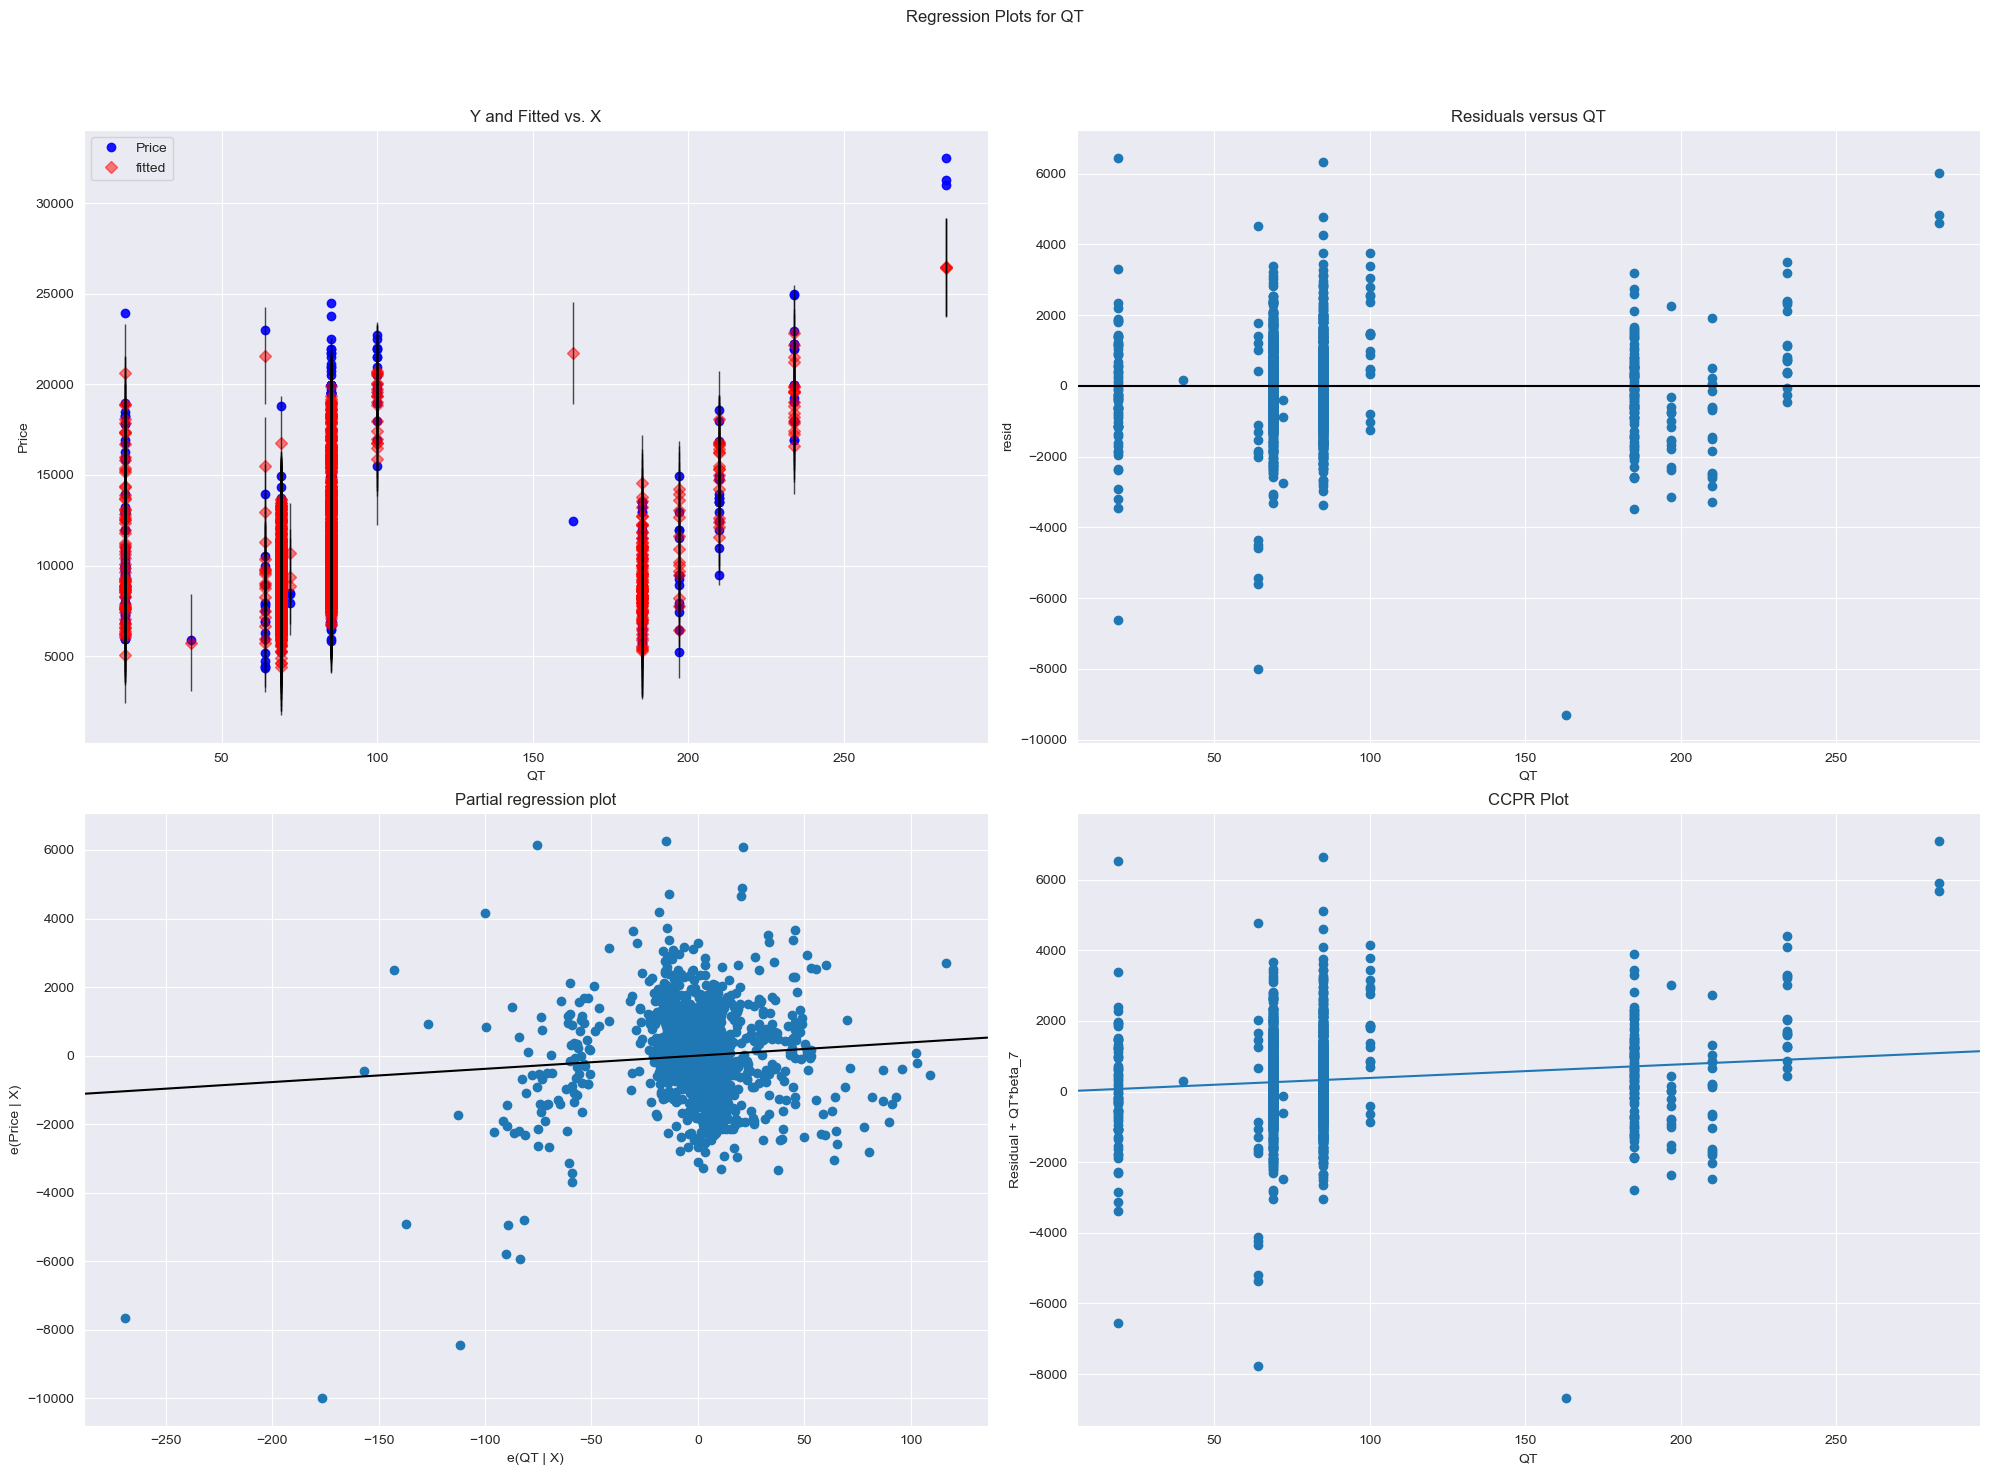

In [46]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


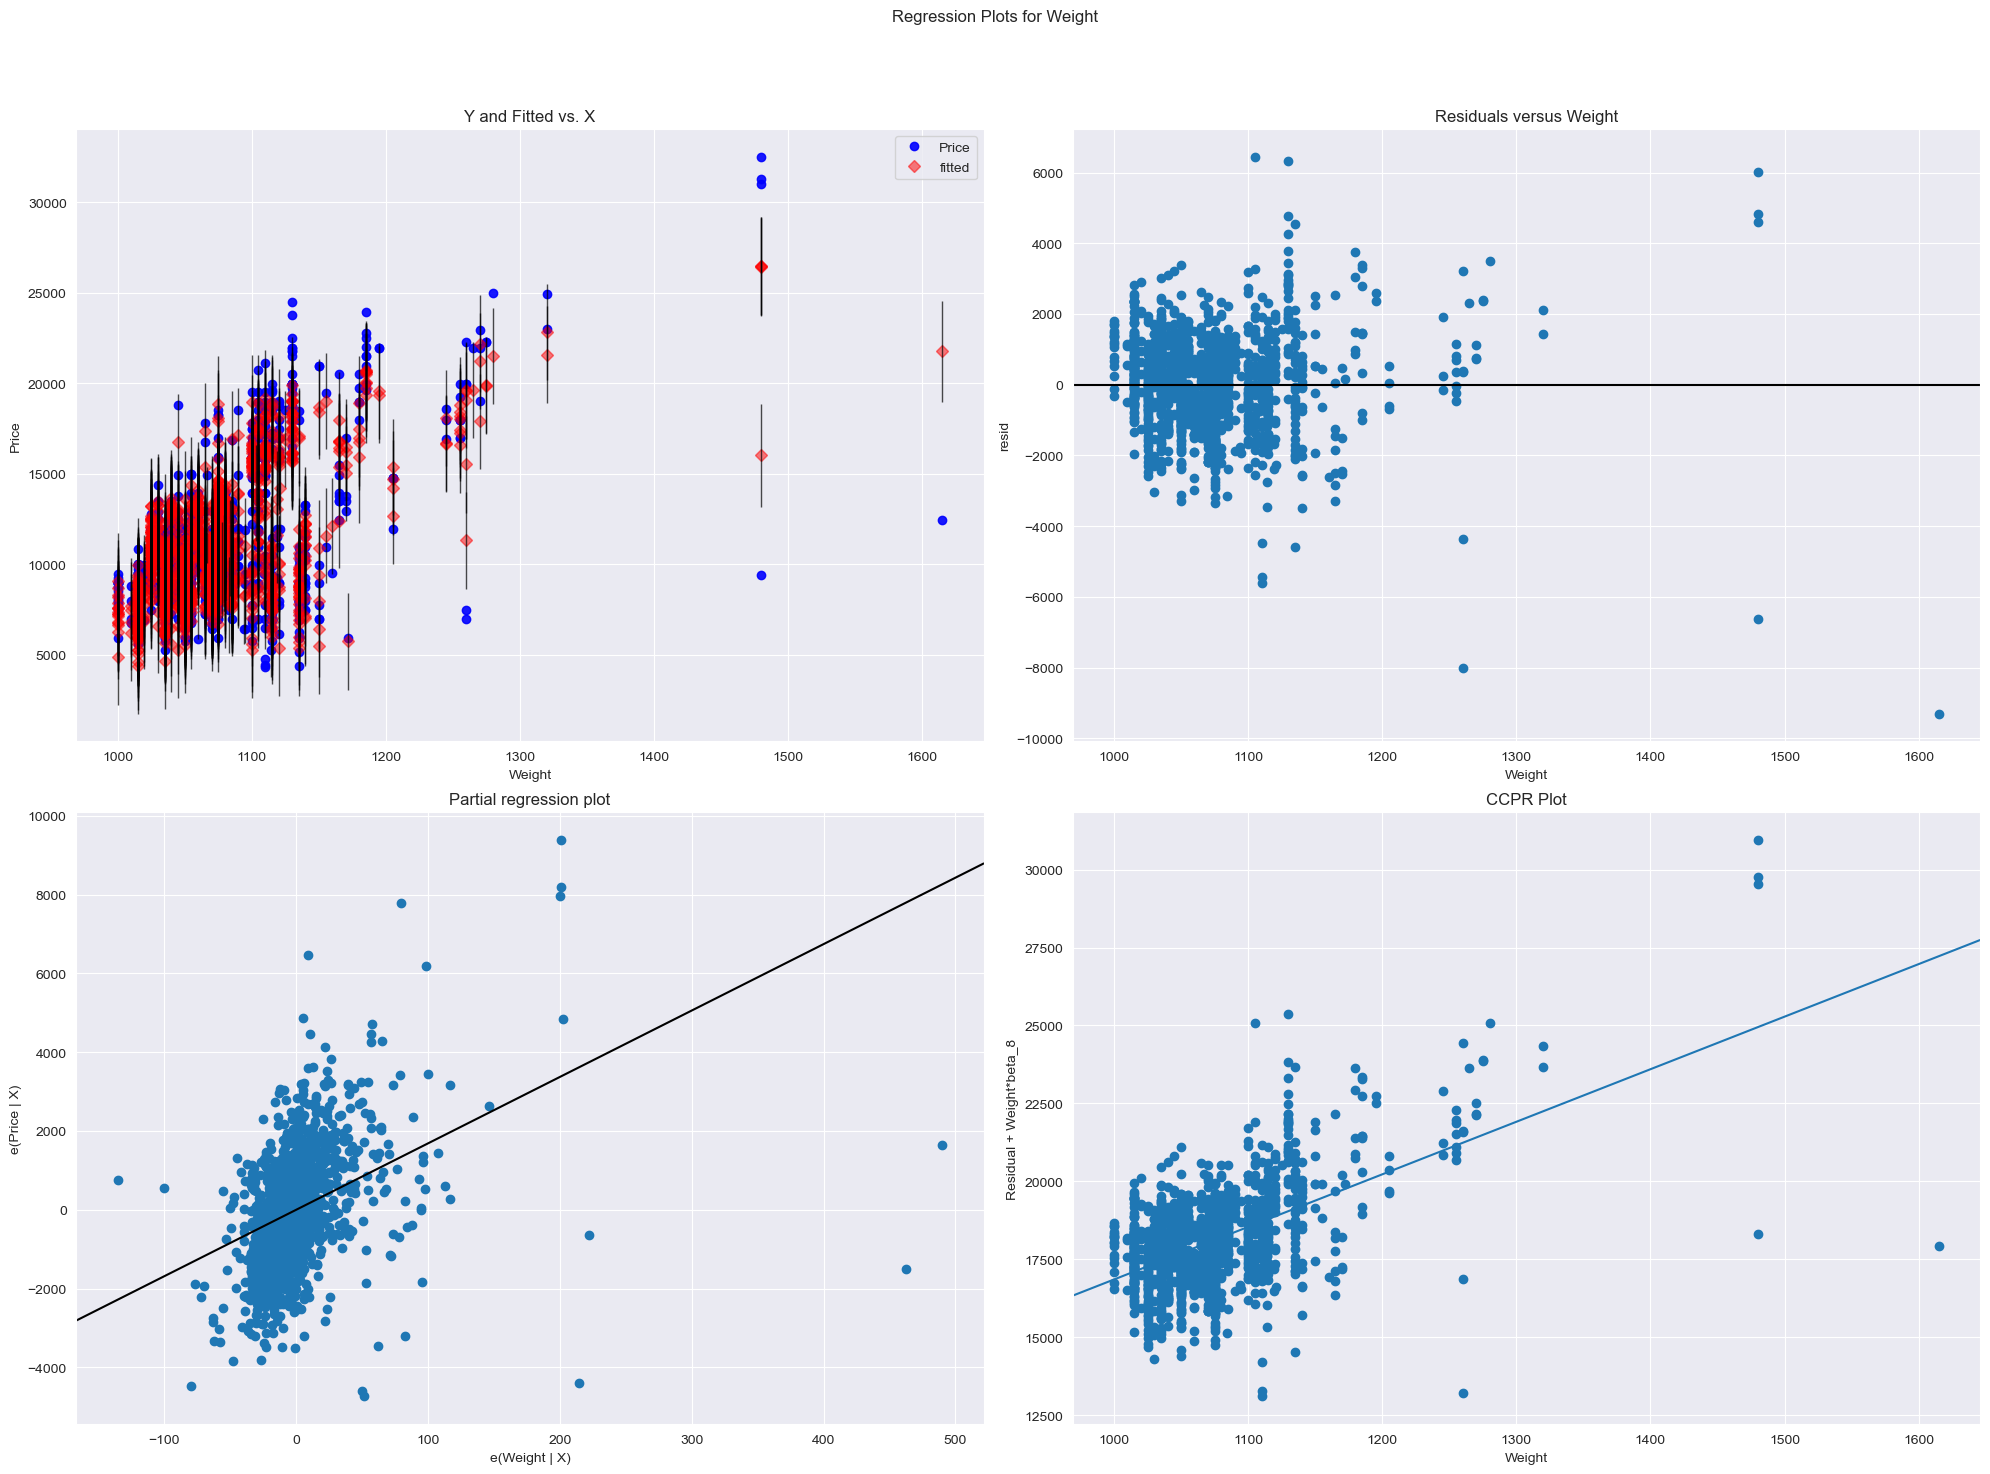

In [47]:
fig=plt.figure(figsize=(20,15))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics

In [48]:
#1. Cooks Distance: If cooks diastance is greater than 1, its an outlier

(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

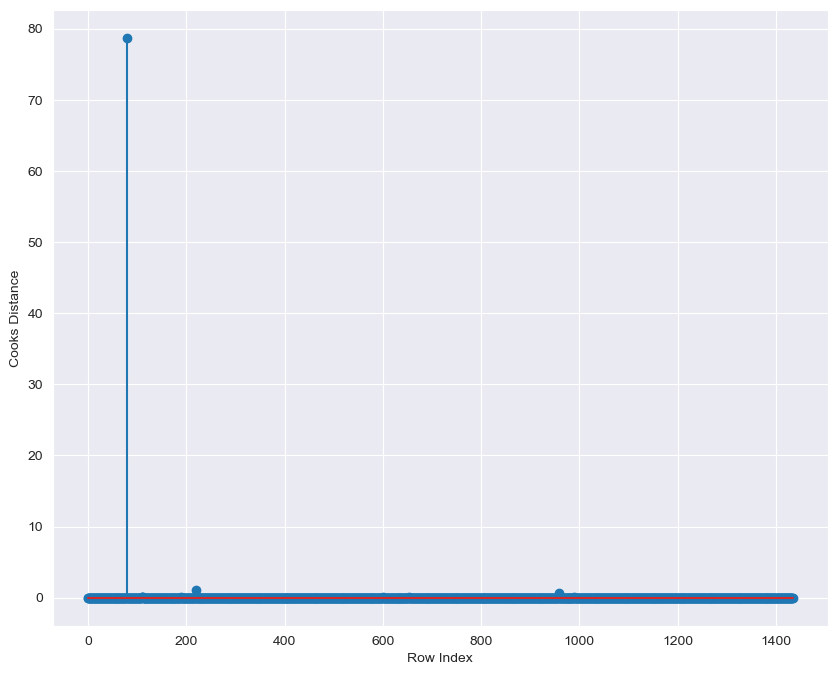

In [52]:
#Plotting Stem plot
fig=plt.figure(figsize=(10,8))
plt.stem(np.arange(len(toyota3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
np.argmax(c), np.max(c)

(80, 78.7295058224556)

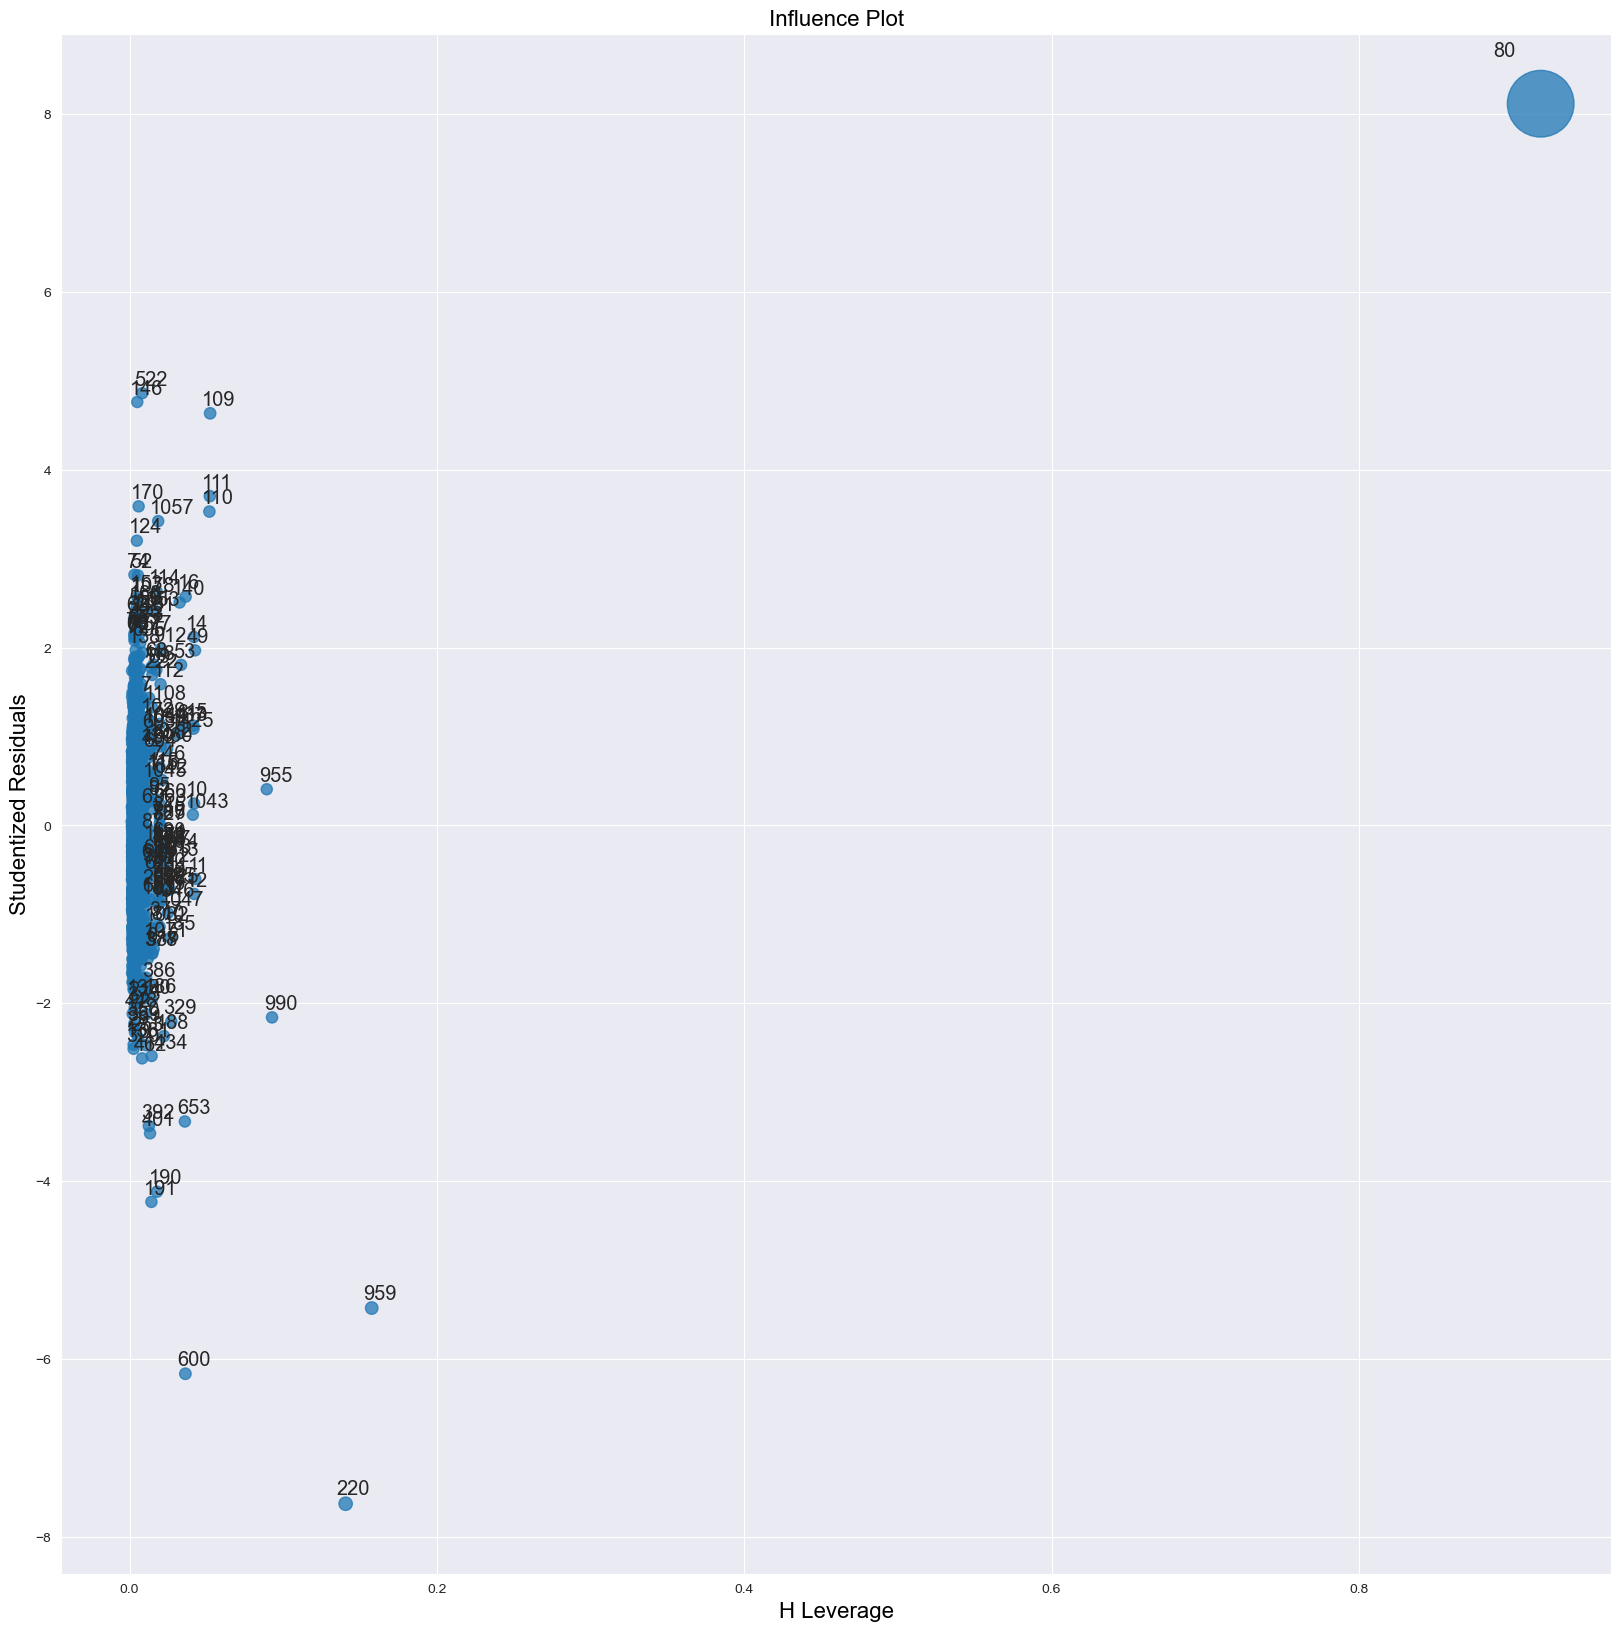

In [58]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)
plt.show()

In [59]:
#Leverage cutoff value = 3*(k+1)/n; k= no. of Features or columns,   n= no. of observations or datapoints
k=toyota3.shape[1]
n=toyota3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [60]:
toyota3[toyota3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [64]:
#deleting this row
toyota4=toyota3.drop(toyota3.index[[80]],axis=0).reset_index(drop=True)
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [75]:
#Creating new model after deleting Infulencer observation
model4=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=toyota4).fit()

In [76]:
#Repeating the same process to identify any other influencers

(c,_)=model4.get_influence().cooks_distance
c

array([6.74590070e-03, 3.61405392e-03, 4.90156911e-03, ...,
       3.65590981e-06, 9.10404094e-04, 9.70018332e-03])

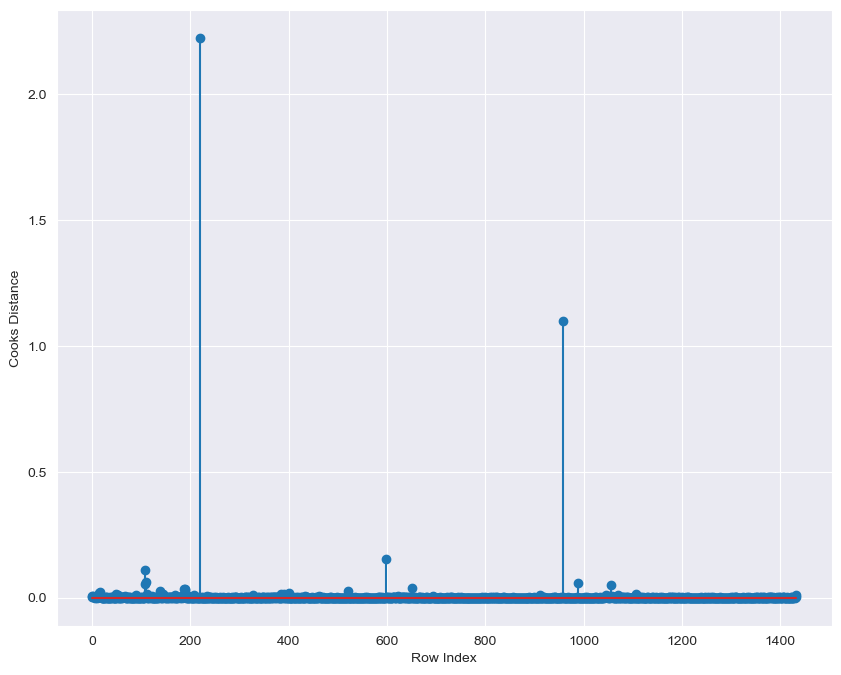

In [77]:
fig=plt.figure(figsize=(10,8))
plt.stem(np.arange(len(toyota4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [78]:
np.argmax(c), np.max(c)

(219, 2.2253513655275103)

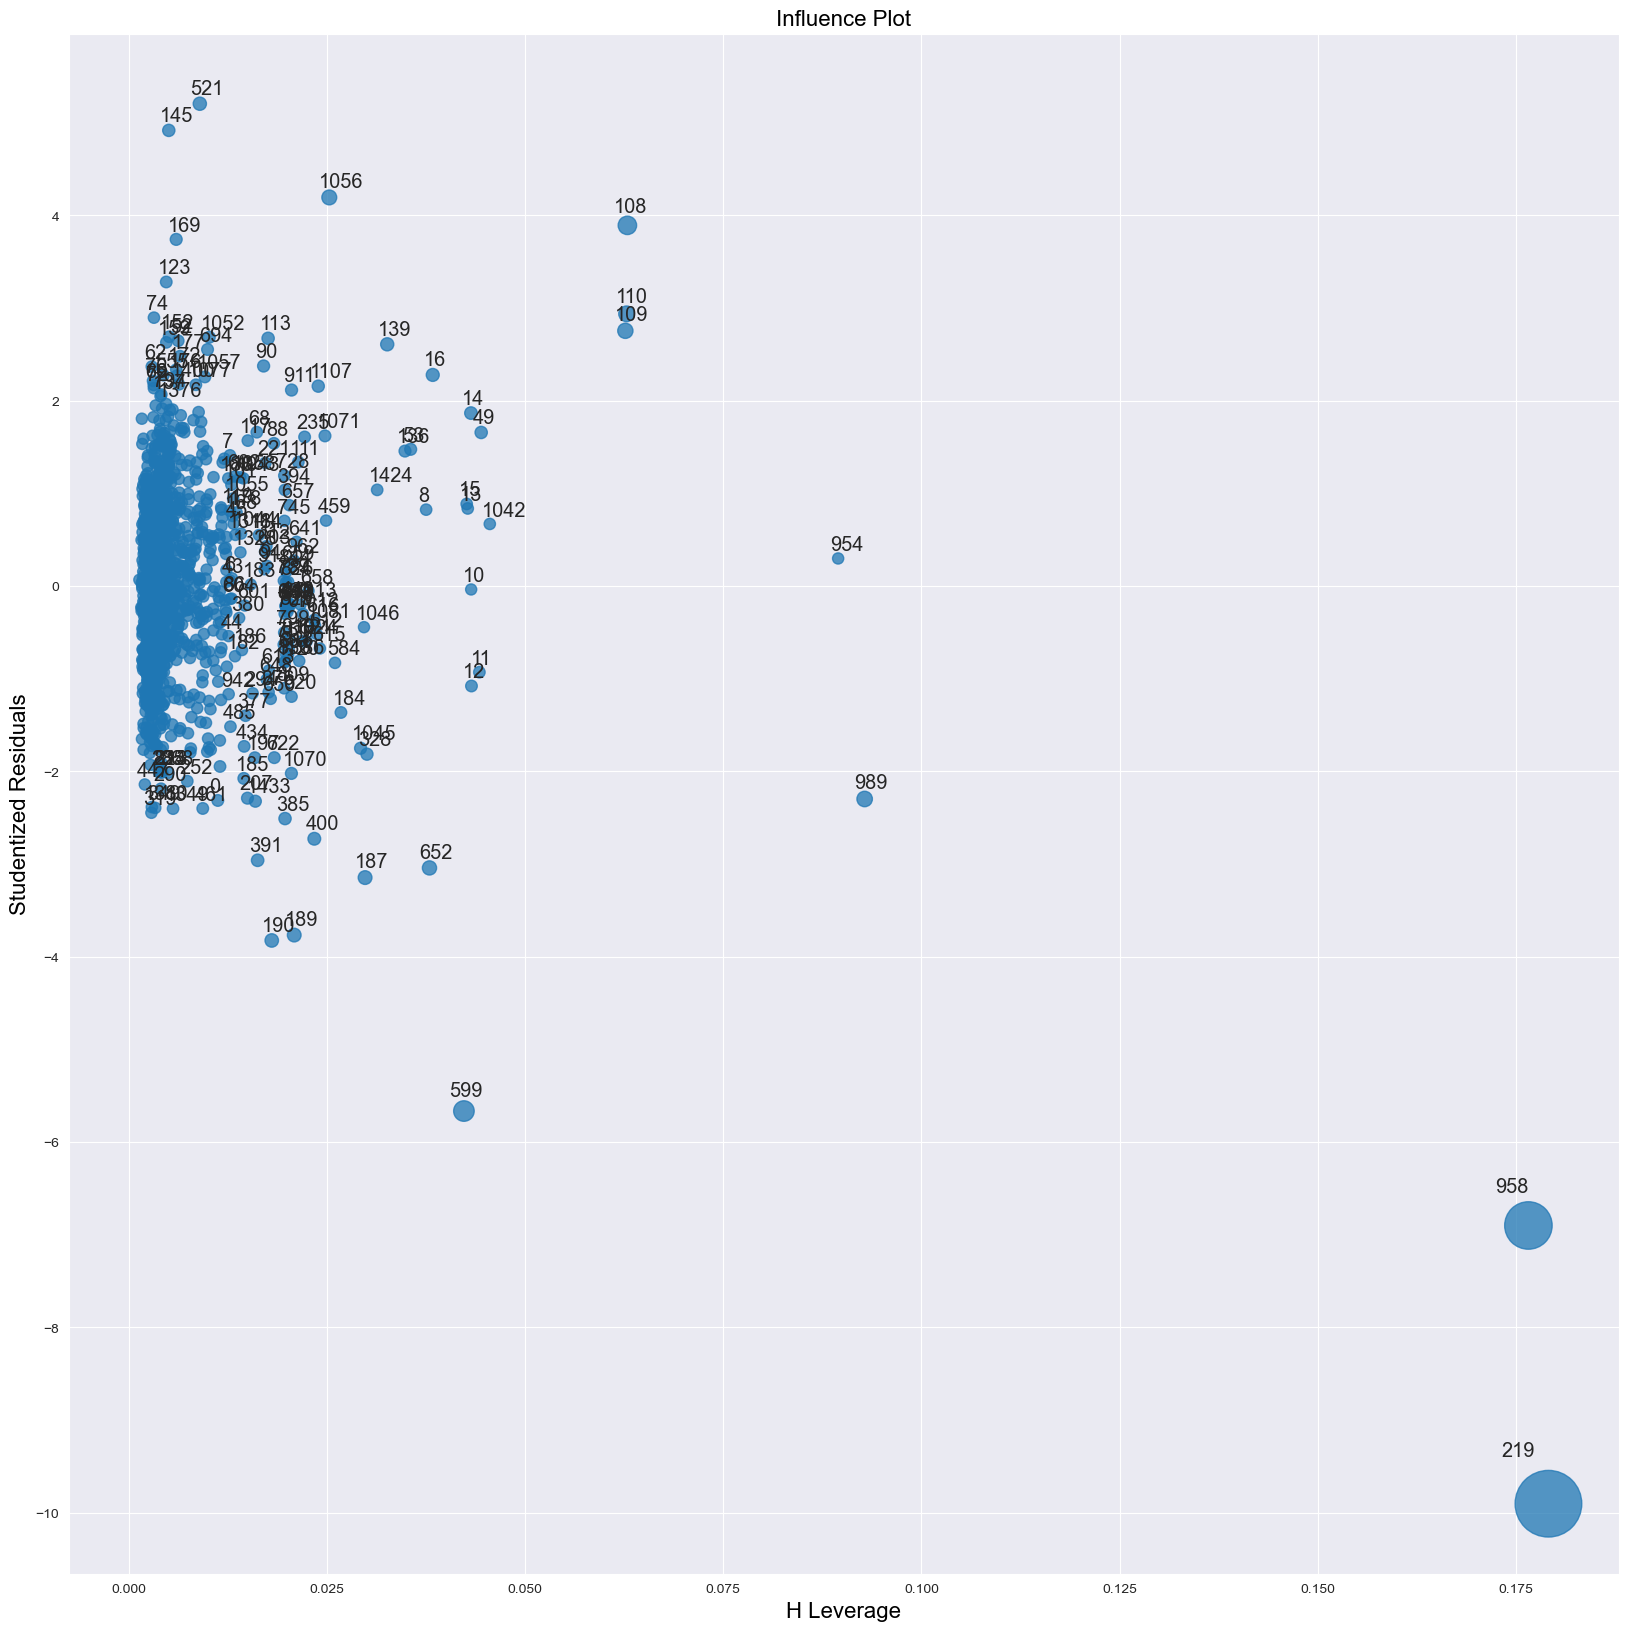

In [82]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model4,ax = ax)
plt.show()

In [83]:
#Leverage cutoff value = 3*(k+1)/n; k= no. of Features or columns,   n= no. of observations or datapoints
k=toyota4.shape[1]
n=toyota4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.02092050209205021

In [84]:
toyota4[toyota4.index.isin([219])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
219,12450,44,74172,110,1600,5,5,163,1615


In [85]:
#deleting this row
toyota5=toyota4.drop(toyota4.index[[219]],axis=0).reset_index(drop=True)
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


# Creating a loop for Model Deletion 

In [86]:
#This process will go until there are influencers
#It will become a lenghty and time consuming process, So we will create a loop and get the Final Model

In [87]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
    final_model.rsquared
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [88]:
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [89]:
toyota5.shape

(1431, 9)

In [90]:
#We have deleted total of 4 observation in Model Deletion process 

# Model Prediction

In [123]:
Prediction=final_model.predict(toyota6)
Prediction

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64